# Test Ollama

In [1]:
import ollama

In [2]:
ollama.list().models

[Model(model='qwen3:8b', modified_at=datetime.datetime(2025, 10, 23, 22, 40, 23, 980120, tzinfo=TzInfo(+07:00)), digest='500a1f067a9f782620b40bee6f7b0c89e17ae61f686b92c24933e4ca4b2b8b41', size=5225388164, details=ModelDetails(parent_model='', format='gguf', family='qwen3', families=['qwen3'], parameter_size='8.2B', quantization_level='Q4_K_M')),
 Model(model='gemma3:270m', modified_at=datetime.datetime(2025, 10, 7, 17, 8, 8, 416665, tzinfo=TzInfo(+07:00)), digest='e7d36fb2c3b3293cfe56d55889867a064b3a2b22e98335f2e6e8a387e081d6be', size=291554930, details=ModelDetails(parent_model='', format='gguf', family='gemma3', families=['gemma3'], parameter_size='268.10M', quantization_level='Q8_0')),
 Model(model='embeddinggemma:300m', modified_at=datetime.datetime(2025, 9, 5, 23, 6, 42, 810027, tzinfo=TzInfo(+07:00)), digest='693ca723e5e742b76da1a20ab96b70c49dacbbd20c22969d2d98c3be46bfb17d', size=621867480, details=ModelDetails(parent_model='', format='gguf', family='gemma3', families=['gemma3'],

In [ ]:
ollama.pull("llama3.2")

In [ ]:
ollama.pull("deepseek-r1:14b")

ProgressResponse(status='success', completed=None, total=None, digest=None)

In [3]:
oo = ollama.chat(model='qwen3:4b', messages=[{'role': 'user', 'content': 'Why is the sky blue?'}])

In [4]:
print(oo["message"]["content"])

<think>
Okay, the user is asking why the sky is blue. I need to explain this in a clear and accurate way. Let me start by recalling what I know about this topic. I remember that it has to do with how sunlight interacts with the Earth's atmosphere. 

First, sunlight is white, but it's actually made up of different colors, each with its own wavelength. The sun emits light across the visible spectrum, which includes all the colors of the rainbow. But when this light enters the Earth's atmosphere, it collides with molecules and small particles in the air. 

I think this is called Rayleigh scattering. Rayleigh scattering is the phenomenon where shorter wavelengths of light (like blue and violet) are scattered more than longer wavelengths (like red and orange). So, when sunlight enters the atmosphere, the blue light is scattered in all directions, which is why we see the sky as blue. 

Wait, but why isn't the sky violet? Because the human eye is more sensitive to blue light than violet, and 

In [23]:
res = ollama.generate(model='llama3.2', prompt='Why is the sky blue?')["response"]

In [24]:
print(res)

The sky appears blue because of a phenomenon called Rayleigh scattering, named after the British physicist Lord Rayleigh, who first described it in the late 19th century.

Here's what happens:

1. **Sunlight enters Earth's atmosphere**: When sunlight enters our atmosphere, it encounters tiny molecules of gases such as nitrogen (N2) and oxygen (O2).
2. **Scattering occurs**: These gas molecules scatter the light in all directions, but they scatter shorter (blue) wavelengths more than longer (red) wavelengths.
3. **Blue light is scattered more**: The blue light is scattered in all directions because it has a shorter wavelength and is more easily deflected by the small gas molecules. This is known as Rayleigh scattering.
4. **Red light continues straight**: The longer wavelength red light, on the other hand, travels in a more direct path through the atmosphere, reaching our eyes from a more oblique angle.

As a result of this scattering process, our eyes see the sky as blue because of the

In [20]:
reasons ="""'At least 34 people have died in the US after violent tornadoes tore through several south-eastern states, flipping cars and flattening homes.In Kansas, a dust storm on Friday afternoon caused a crash with more than 50 vehicles, killing at least 8 people. Texas saw a similar mass pile-up.A state of emergency has been declared in several states, including Arkansas, Georgia and Oklahoma, where more than 100 wildfires are raging.A third day of severe weather is expected on Sunday, with flash flooding and more tornado warnings issued across the region. The National Weather Service (NWS) warned of "intense to violent" tornadoes, describing the situation as "particularly dangerous"."Get to the sturdiest structure you have access to and remain in place until the storms pass," the NWS told residents in Alabama on Saturday night, when multiple tornado warnings were issued.At least 250,000 properties across the US were without power on Sunday morning, according to tracker PowerOutage.In Missouri, where at least 12 people died, Governor Mike Kehoe said the state had been "devastated by severe storms... leaving homes destroyed and lives lost".Initial reports showed 19 tornadoes had struck 25 counties in the state, its emergency management agency said.A home belonging to one of the those killed was torn apart."It was unrecognisable as a home. Just a debris field," Coroner Jim Akers of Butler County told the BBC's US partner, CBS News."The floor was upside down. We were walking on walls."Alicia Wilson, who was evacuated from her Missouri home, told local TV station KSDK: "It was the scariest thing I've ever been through - it was so fast, our ears were all about to burst."A woman in Mississippi described how terrified her daughter was."All I could hear was my six year old screaming that she didn't want to die - you don't want to hear that coming out of your baby's mouth," Jericho McCoy said."""
question = "what happend"

In [21]:
res2 = ollama.generate(model="llama3.2", prompt=reasons + "/n" + question)["response"]

In [22]:
print(res2)

Severe weather, including tornadoes and dust storms, has caused widespread damage and loss of life in several southern US states. The affected areas include:

1. Kansas: A dust storm on Friday afternoon caused a crash involving over 50 vehicles, resulting in at least 8 deaths.
2. Texas: A similar mass pile-up occurred.
3. Arkansas: A state of emergency has been declared due to multiple wildfires raging across the state.
4. Georgia: A state of emergency has also been declared in response to severe weather and wildfires.
5. Oklahoma: A state of emergency has been declared, with over 100 wildfires burning across the state.

The National Weather Service (NWS) has issued warnings for intense to violent tornadoes, flash flooding, and more tornado warnings are expected on Sunday. At least 250,000 properties in the US were without power on Sunday morning, according to PowerOutage tracker.

Missouri was particularly hard hit, with at least 12 deaths reported. The state's emergency management ag

# Test LangChangeRAG

In [2]:
import getpass
import os
import ollama

import bs4
from langchain import hub
from langchain_community.document_loaders import WebBaseLoader
from langchain.document_loaders import PyMuPDFLoader
from langchain_core.documents import Document
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langgraph.graph import START, StateGraph
from typing_extensions import List, TypedDict
from langchain_community.llms import Ollama
from langchain_ollama import OllamaEmbeddings
from langchain_core.vectorstores import InMemoryVectorStore

# os.environ["LANGSMITH_TRACING"] = "true"
# os.environ["LANGSMITH_API_KEY"] = getpass.getpass()

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [30]:
ollama.embed(model='llama3.2', input='The sky is blue because of rayleigh scattering')

EmbedResponse(model='llama3.2', created_at=None, done=None, done_reason=None, total_duration=2871553647, load_duration=2689702543, prompt_eval_count=9, prompt_eval_duration=None, eval_count=None, eval_duration=None, embeddings=[[0.0020367801, 0.0025579252, 0.022270149, -0.035124056, -0.0051569073, 0.0028548553, 0.016363285, 0.0039458014, 0.01544873, -0.020881036, 0.015887987, 0.010656493, -0.011599893, 0.044989858, -0.019073345, 0.020426793, 0.007715034, 0.013821391, 0.013020488, 0.004140592, -0.0013623855, -0.0059295036, 0.0005705611, -0.013798798, 0.013001453, -0.0019770046, 0.0010431902, -0.03261254, 0.0073278164, 0.00045058536, 0.0045851474, 0.019107683, -0.015957355, 0.031251278, 0.024484951, -0.008455839, 0.004205513, 0.0036324202, -0.009327604, -0.016314413, -0.02214816, 0.00042867754, 0.006468863, 0.020522099, -0.010147465, -0.0021579405, 0.019829066, 0.0029759977, 0.0057103797, -0.0070561226, -0.01771411, -0.0023578852, 0.009528793, 0.029391997, 0.02415096, 0.0003508468, 0.022

In [32]:
ollama.generate(model='llama3.2', prompt='Why is the sky blue?').response

"The sky appears blue to our eyes because of a phenomenon called Rayleigh scattering. Here's what happens:\n\n1. When sunlight enters Earth's atmosphere, it encounters tiny molecules of gases such as nitrogen (N2) and oxygen (O2).\n2. These molecules scatter the light in all directions, but they scatter shorter (blue) wavelengths more than longer (red) wavelengths.\n3. This is because the smaller molecules are more effective at scattering the blue light due to its smaller wavelength.\n4. As a result, the scattered blue light is distributed throughout the atmosphere and reaches our eyes from all directions.\n5. Since we're seeing the sky from below, we perceive the blue color of the scattered light as the dominant color.\n\nThe reason the sky appears more vivid during sunrise and sunset is because the sun's rays travel through more of Earth's atmosphere at these times, scattering even more of the shorter wavelengths (like blue and violet). This results in a greater range of colors being

In [2]:
llm = Ollama(model="llama3.2")  # Replace with "llama3", "gemma", etc.

response = llm.invoke("What is Retrieval-Augmented Generation (RAG)?")
print(response)


/tmp/ipykernel_15278/2053289234.py:1: LangChainDeprecationWarning: The class `Ollama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaLLM``.
  llm = Ollama(model="llama3.2")  # Replace with "llama3", "gemma", etc.


Retrieval-Augmented Generation (RAG) is a type of conversational AI model that combines retrieval mechanisms with generation capabilities. It was first introduced in the paper "Re-Ranking of Retrieved Documents for Conversational AI" by Raghav Gupta et al.

In traditional conversational AI models, the goal is to generate text based on user input, such as answering questions or completing tasks. However, this approach can lead to incomplete or inaccurate responses if the model cannot fully understand the context or intent behind the user's query.

RAG addresses this limitation by introducing a retrieval component that searches for relevant documents or knowledge graphs related to the user's input. The retrieved documents are then used as inputs to generate text that is more accurate, complete, and contextually relevant.

The RAG architecture typically consists of three main components:

1. **Retriever**: This module searches for relevant documents or knowledge graphs based on the user's

In [3]:
from langchain_community.vectorstores import Chroma
from langchain.embeddings import HuggingFaceEmbeddings

# Load embedding model
# embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
embeddings = OllamaEmbeddings(model="llama3.2")

# Create Chroma vector store
vector_store = Chroma(persist_directory="./data_base/chroma_db", embedding_function=embeddings)


/tmp/ipykernel_15278/1177119939.py:9: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vector_store = Chroma(persist_directory="./data_base/chroma_db", embedding_function=embeddings)


In [37]:
embeddings = OllamaEmbeddings(model="llama3.2")

In [38]:
vector_store = InMemoryVectorStore(embeddings)

In [19]:
# Load and chunk contents of the blog
loader = WebBaseLoader(
    # web_paths=("https://lilianweng.github.io/posts/2023-06-23-agent/",),
    web_paths=("https://www.bbc.com/news/articles/cevx7lkznm1o","https://www.bbc.com/news/articles/cevx7lkznm1o"),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            # data_component_=("headline-block", "text-block")
            attrs={"data-component": ["headline-block", "text-block"]}
            #class_=("post-content", "post-title", "post-header")
        )
    ),
)
docs = loader.load()

In [28]:
docs[1].metadata["source"]

'https://www.bbc.com/news/articles/cevx7lkznm1o'

In [ ]:
loader = PyMuPDFLoader("./data/C1 Introduction.pdf")
docs = loader.load()

In [19]:
docs

[Document(metadata={'source': 'https://www.bbc.com/news/articles/cevx7lkznm1o'}, page_content='Tornadoes and dust storms leave at least 34 dead in southern USAt least 34 people have died in the US after violent tornadoes tore through several south-eastern states, flipping cars and flattening homes.In Kansas, a dust storm on Friday afternoon caused a crash with more than 50 vehicles, killing at least 8 people. Texas saw a similar mass pile-up.A state of emergency has been declared in several states, including Arkansas, Georgia and Oklahoma, where more than 100 wildfires are raging.A third day of severe weather is expected on Sunday, with flash flooding and more tornado warnings issued across the region. The National Weather Service (NWS) warned of "intense to violent" tornadoes, describing the situation as "particularly dangerous"."Get to the sturdiest structure you have access to and remain in place until the storms pass," the NWS told residents in Alabama on Saturday night, when multi

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=200, chunk_overlap=50)
all_splits = text_splitter.split_documents(docs)

# Index chunks
_ = vector_store.add_documents(documents=all_splits)

In [17]:
all_splits

[Document(metadata={'source': 'https://www.bbc.com/news/articles/cevx7lkznm1o'}, page_content='Tornadoes and dust storms leave at least 34 dead in southern USAt least 34 people have died in the US after violent tornadoes tore through several south-eastern states, flipping cars and flattening'),
 Document(metadata={'source': 'https://www.bbc.com/news/articles/cevx7lkznm1o'}, page_content='states, flipping cars and flattening homes.In Kansas, a dust storm on Friday afternoon caused a crash with more than 50 vehicles, killing at least eight people. Texas saw a similar mass pile-up.A'),
 Document(metadata={'source': 'https://www.bbc.com/news/articles/cevx7lkznm1o'}, page_content='eight people. Texas saw a similar mass pile-up.A state of emergency has been declared in several states, including Arkansas, Georgia and Oklahoma, where more than 100 wildfires were raging.A third'),
 Document(metadata={'source': 'https://www.bbc.com/news/articles/cevx7lkznm1o'}, page_content='where more than 100 

In [36]:
# Define prompt for question-answering
prompt = hub.pull("rlm/rag-prompt")

In [49]:
# Define state for application
class State(TypedDict):
    question: str
    context: List[Document]
    answer: str


# Define application steps
def retrieve(state: State):
    retrieved_docs = vector_store.similarity_search(state["question"], k=5)
    print(retrieved_docs)
    print("---------------------------------------------------------------------")
    return {"context": retrieved_docs}


def generate(state: State):
    docs_content = "\n\n".join(doc.page_content for doc in state["context"])
    print(docs_content)
    print("---------------------------------------------------------------------")
    messages = prompt.invoke({"question": state["question"], "context": docs_content})
    print(messages.to_string())
    # print(messages.content)
    # print(type(messages))
    print("---------------------------------------------------------------------")
    print("\n\n\n")
    response = ollama.generate(model='llama3.2', prompt=messages.to_string()).response
    # response = llm.invoke(messages)
    return {"answer": response}


# Compile application and test
graph_builder = StateGraph(State).add_sequence([retrieve, generate])
graph_builder.add_edge(START, "retrieve")
graph = graph_builder.compile()

response = graph.invoke({"question": "How many people died in missouri"})
print(response["answer"])

[Document(id='8180a02b-3904-46ae-ad11-d211d51388c7', metadata={'source': 'https://www.bbc.com/news/articles/cevx7lkznm1o'}, page_content='to the sturdiest structure you have access to and remain in place until the storms pass," the NWS told residents in Alabama on Saturday night, when multiple tornado warnings were issued.At least'), Document(id='0aa90aaa-dbe1-4c4f-baa8-b1fffe3e5dfc', metadata={'source': 'https://www.bbc.com/news/articles/cevx7lkznm1o'}, page_content='states, flipping cars and flattening homes.In Kansas, a dust storm on Friday afternoon caused a crash with more than 50 vehicles, killing at least 8 people. Texas saw a similar mass pile-up.A state'), Document(id='7a271db7-3a12-48a4-9984-3831b640afc0', metadata={'source': 'https://www.bbc.com/news/articles/cevx7lkznm1o'}, page_content='ever seen," Sgt Cindy Barkley, of the state\'s public safety department, told reporters."We couldn\'t tell that they were all together until the dust kind of settled."The destructive storms

In [4]:
ollama.list().models

[Model(model='gemma3:1b', modified_at=datetime.datetime(2025, 3, 17, 2, 18, 23, 500365, tzinfo=TzInfo(+07:00)), digest='2d27a774bc629ba3d5a3b31a8f11d315e8f49e5b8f7e6fc024dce67f539d1a84', size=815319769, details=ModelDetails(parent_model='', format='gguf', family='gemma3', families=['gemma3'], parameter_size='999.89M', quantization_level='Q4_K_M')),
 Model(model='gemma3:4b', modified_at=datetime.datetime(2025, 3, 17, 2, 15, 57, 563364, tzinfo=TzInfo(+07:00)), digest='c0494fe00251c4fc844e6a1801f9cbd26c37441d034af3cb9284402f7e91989d', size=3338801718, details=ModelDetails(parent_model='', format='gguf', family='gemma3', families=['gemma3'], parameter_size='4.3B', quantization_level='Q4_K_M')),
 Model(model='deepseek-r1:1.5b', modified_at=datetime.datetime(2025, 3, 17, 0, 50, 10, 736073, tzinfo=TzInfo(+07:00)), digest='a42b25d8c10a841bd24724309898ae851466696a7d7f3a0a408b895538ccbc96', size=1117322599, details=ModelDetails(parent_model='', format='gguf', family='qwen2', families=['qwen2'], 

In [ ]:
from pdfminer.high_level import extract_text

data_pdf = extract_text("./data/C12 Privacy and Convenience.pdf")
print(data_pdf)


In [29]:
from langchain.document_loaders import PyMuPDFLoader
import time

loader = PyMuPDFLoader("./data/C1 Introduction.pdf")
documents = loader.load()

In [40]:
data_pdf = "\n\n\n".join(["page: " + str(ddata.metadata['page']) + "\n\n" + ddata.page_content for ddata in documents])

In [41]:
print(data_pdf)

page: 0

Chapter 1 Introduction
241-304 ประเด็นทางจริยธรรม สังคมและกฎหมายส าหรับวิชาชีพด้าน
ปัญญาประดิษฐ์
Ethical, Social and Legal Issues for Artificial Intelligence Professions
Taught by Pichaya Tandayya


page: 1

แนวทางการน าเสนอเนื้อหา
1. แนวคิดเชิงปรัชญาและทฤษฎีทางจริยธรรม ซึ่งไม่ขึ้นตรงต่อศาสนา
2. กฎหมายและที่มา
3. การวิเคราะห์และอภิปรายประเด็นต่างๆ
4. แนวทางการพิจารณาและด าเนินการในสถานการณ์ต่างๆ
5. ความคิดรวบยอดหรือสาระส าคัญของจรรยาบรรณวิชาชีพ


page: 2

ความหมายของจริยธรรม
•จริยธรรมเป็นการศึกษาเกี่ยวกับการกระท าสิ่งที่ถกกต้อง 
• เป็นเรื่องที่ซับซ้อน ยากต่อการก าหนดเป็นมาตรฐานที่ชัดเจน 
• การกระท าหนึ่งๆในสถานการณ์และปัจจัยที่แตกต่างกัน อาจ
ให้ผลที่แตกต่างกันมาก


page: 3

ศัพท์ที่เกี่ยวข้อง
•Values (คุณค่า ค่านิยม)
•Morals (ศีลธรรม/ความรก้สึกผิดชอบ)
•Ethics (จริยธรรม)


page: 4

1. แนวคิดเชิงปรัชญาและทฤษฎีทางจริยธรรม 
• ทฤษฎีทางจริยธรรม
• ทฤษฎีประโยชน์นิยม (Utilitarianism) 
• จริยศาสตร์เชิงกรณียธรรม (Deontological Theory)
• สิทธิตามธรรมชาติ (Natural Rights)


page: 5

1. แนว

In [ ]:
qq = "data from pdf : " + data_pdf + "\n" + "question : สรุปเป็น bullet ไม่ตำ่กว่า 100 ตัวอักษร"

In [51]:
qq = "data from pdf : " + data_pdf + "\n" + "question : สรุปเป็น bullet 10000 ตัวอักษร เป็นภาษาไทย"

In [15]:
qq = "data from pdf : " + data_pdf + "\n" + "question :  เรียบเรียงเนื้อหาทั้งหมด ขอมากกว่า 10000 อักษร เป็นภาษาไทย"

In [ ]:
qq = "data from pdf : " + data_pdf + "\n" + "question :  ช่วยฉันเรียบเรียงเนื้อหาทั้งหมดจาก slide pdf จากหน้าแรก ถึงหน้าสุดท้าย โดยลงรายละเอียดในหัวข้อย่อยตามจำนวนหัวข้อย้อยที่มีใน slide อย่างละเอียดมากที่สุด ไม่ต้องสรุป ถ้าเนื้อหาเป็นภาษาอังกฤษให้แปลเป็นภาษาไทย"

In [ ]:
qq = "data from pdf : " + data_pdf + "\n" + "question :  ช่วยฉันเรียบเรียงเนื้อหาทั้งหมดจาก slide pdf จากหน้าแรก ถึงหน้าสุดท้าย บอกเลขหน้าที่อ่านได้ โดยลงรายละเอียดในหัวข้อย่อยตามจำนวนหัวข้อย้อยที่มีใน อย่างละเอียดมากที่สุด ถ้าเป็นภาษาอังกฤษให้แปลเป็นภาษาไทย generate จนกว่าจะถึงหน้าสุดท้าย"

In [ ]:
qq = "data from pdf : " + data_pdf + "\n" + "question :  ช่วยฉันเรียบเรียงเนื้อหาทั้งหมดจาก slide pdf จากหน้าแรก ถึงหน้าสุดท้าย บอกเลขหน้าที่อ่านได้ โดยลงรายละเอียดในหัวข้อย่อยตามจำนวนหัวข้อย้อยที่มีใน อย่างละเอียดมากที่สุด ถ้าเป็นภาษาอังกฤษให้แปลเป็นภาษาไทย generate จนกว่าจะถึงหน้าสุดท้าย ไม่ต้องสรุป"

In [ ]:
st=time.time()
response = ollama.generate(model='gemma3:1b', prompt=qq, options={'num_ctx': 1024*1, # Context size
                                                                   'num_predict': 1024*1    # Increase max output tokens
                                                                  }).response
print(time.time() - st)

In [ ]:
print(response)

In [ ]:
FullMessage = []
all_resMessage = ""
FullMessage.append({'role': 'user', 'content': 'ดึงข้อความทั้งหมดจากทุกหน้าของสไลด์ หากข้อความเป็นภาษาอังกฤษ ให้แปลเป็นภาษาไทย หากเป็นภาษาไทยให้นำมาแบบเดิม จัดรูปแบบให้เข้าใจง่ายและคงโครงสร้างของเนื้อหาเดิมให้มากที่สุด ใส่เลขหน้าด้วย'})
respond = ollama.chat(model='llama3.2:latest', messages=FullMessage, options={'num_ctx': 1024*1, # Context size
                                                                   'num_predict': 1024    # Increase max output tokens
                                                                  })
mess = respond.message
all_resMessage = all_resMessage + "\n\n" + mess.content
for page in documents:
    FullMessage.append({'role': mess.role, 'content': mess.content})
    FullMessage.append({'role': 'user', 'content': "page: " + str(page.metadata['page']) + "\n\n" + page.page_content + "ดึงข้อความทั้งหมดจากทุกหน้าของสไลด์ หากข้อความเป็นภาษาอังกฤษ ให้แปลเป็นภาษาไทย หากเป็นภาษาไทยให้นำมาแบบเดิม จัดรูปแบบให้เข้าใจง่ายและคงโครงสร้างของเนื้อหาเดิมให้มากที่สุด ใส่เลขหน้าด้วย"})
    respond = ollama.chat(model='llama3.2:latest', messages=FullMessage, options={'num_ctx': 1024*1, # Context size
                                                                   'num_predict': 1024    # Increase max output tokens
                                                                  })
    mess = respond.message
    print(mess.content)
    all_resMessage = all_resMessage + "\n\n" + mess.content
    

In [7]:
print(all_resMessage)



แน่นอนครับ กรุณาใส่สไลด์ที่คุณต้องการให้ผมดึงข้อความมา ผมพร้อมที่จะทำตามคำขอของคุณครับ

**Chapter 1: Introduction**

*   **ประเด็นทางจริยธรรม สังคมและกฎหมายส าหรับวิชาชีพด้านปัญญาประดิษฐ์** (Ethical, Social and Legal Issues for Artificial Intelligence Professions)
*   **เนื้อหา:** เป็นการเรียนรู้เกี่ยวกับประเด็นสำคัญที่เกี่ยวข้องกับจริยธรรม, สังคม และกฎหมายที่เกี่ยวข้องกับอาชีพที่เกี่ยวข้องกับปัญญาประดิษฐ์ (AI)

**หมายเหตุ:** ข้อมูลที่ให้มาเป็นเพียงส่วนหนึ่งของเนื้อหาในสไลด์นี้ครับ

**Page 1: Introduction to the Approach**

*   **แนวทางการน าเสนอเนื้อหา:**
    1.  **แนวคิดเชิงปรัชญาและทฤษฎีทางจริยธรรม (Philosophical and Legal Theories)** - ไม่ขึ้นตรงต่อศาสนา
    2.  **กฎหมายและที่มา (Laws and Sources)** - เน้นที่กฎหมายและแหล่งที่มา
    3.  **การวิเคราะห์และอภิปรายประเด็นต่างๆ (Discussion and Analysis of Issues)** - เน้นการอภิปรายและวิเคราะห์
    4.  **แนวทางการพิจารณาและด าเนินการในสถานการณ์ต่างๆ (Considering and Addressing Situations)** - เน้นการพิจารณาและจัดการกับสถานการณ์ต่างๆ
   

In [ ]:
import os
from pdfminer.high_level import extract_text
from langchain.document_loaders import PyMuPDFLoader

# List all files in the ./data directory
files = os.listdir("./data")

# Loop through each file and extract text if it's a PDF
for file in files:
    if file.endswith(".pdf"):  # Check if the file is a PDF
        file_path = os.path.join("./data", file)
        # data_pdf = extract_text(file_path)
        loader = PyMuPDFLoader(file_path)
        documents = loader.load()
        data_pdf = "\n\n\n".join(["page: " + str(ddata.metadata['page']) + "\n\n" + ddata.page_content for ddata in documents])
        # qq = "data from pdf : " + data_pdf + "\n" + "question : สรุปเป็น หัวข้อ อย่างละเอียด 8000 - 10000 ตัวอักษร เป็นภาษาไทย"
        # qq = "data from pdf : " + data_pdf + "\n" + "question :  ช่วยฉันเรียบเรียงเนื้อหาทั้งหมดจาก slide pdf จากหน้าแรก ถึงหน้าสุดท้าย อย่างละเอียดมากที่สุด ไม่ต้องสรุป"
        # qq = "data from pdf : " + data_pdf + "\n" + "question :  ช่วยฉันเรียบเรียงเนื้อหาทั้งหมดจาก slide pdf จากหน้าแรก ถึงหน้าสุดท้าย โดยลงรายละเอียดในหัวข้อย่อยตามจำนวนหัวข้อย้อยที่มีใน slide อย่างละเอียดมากที่สุด ไม่ต้องสรุป ถ้าเนื้อหาเป็นภาษาอังกฤษให้แปลเป็นภาษาไทย"
        # qq = "data from pdf : " + data_pdf + "\n" + "question :  ช่วยฉันเรียบเรียงเนื้อหาทั้งหมดจาก slide pdf จากหน้าแรก ถึงหน้าสุดท้าย บอกเลขหน้าที่อ่านได้ โดยลงรายละเอียดในหัวข้อย่อยตามจำนวนหัวข้อย้อยที่มีใน อย่างละเอียดมากที่สุด ถ้าเป็นภาษาอังกฤษให้แปลเป็นภาษาไทย generate จนกว่าจะถึงหน้าสุดท้าย"
        qq = "data from pdf : " + data_pdf + "\n" + "question :  ช่วยฉันเรียบเรียงเนื้อหาทั้งหมดจาก slide pdf จากหน้าแรก ถึงหน้าสุดท้าย บอกเลขหน้าที่อ่านได้ โดยลงรายละเอียดในหัวข้อย่อยตามจำนวนหัวข้อย้อยที่มีใน อย่างละเอียดมากที่สุด ถ้าเป็นภาษาอังกฤษให้แปลเป็นภาษาไทย generate จนกว่าจะถึงหน้าสุดท้าย ไม่ต้องสรุป"
        # response = ollama.generate(model='gemma3:1b', prompt=qq, options={'num_ctx': 1024*2}).response
        st=time.time()
        response = ollama.generate(model='gemma3:27b', prompt=qq, options={'num_ctx': 1024*20, # Context size
                                                                   'num_predict': 1024*20    # Increase max output tokens
                                                                  }).response
        print(time.time() - st)
        # Save the response to a text file with the same name as the PDF file
        text_file_path = os.path.splitext(file_path)[0] + ".txt"
        print("save to " , text_file_path)
        with open(text_file_path, "w", encoding="utf-8") as text_file:
            text_file.write(response)

save to  ./data/C1 Introduction.txt
save to  ./data/C12 Privacy and Convenience.txt
save to  ./data/C8 Ethics and AI Scenarios.txt
save to  ./data/C5 IPs.txt
save to  ./data/C9 Ethical Algorithm Introduction.txt
save to  ./data/C13 Ethics in Action.txt
save to  ./data/C3 Discussion and Logic.txt
save to  ./data/C7 State of AI and AI Ethical Concerns.txt
save to  ./data/C2 Professional Ethics.txt
save to  ./data/C10 Algorithms Models and Limitations.txt
save to  ./data/C11 Data Fairness and Bias.txt
save to  ./data/C4 Privacy.txt
save to  ./data/C6 Risks.txt


In [ ]:
import os
from pdfminer.high_level import extract_text
from langchain.document_loaders import PyMuPDFLoader

# List all files in the ./data directory
files = os.listdir("./data")

# Loop through each file and extract text if it's a PDF
for file in files:
    if file.endswith(".pdf"):  # Check if the file is a PDF
        file_path = os.path.join("./data", file)
        # data_pdf = extract_text(file_path)
        loader = PyMuPDFLoader(file_path)
        documents = loader.load()
        FullMessage = []
        all_resMessage = ""
        FullMessage.append({'role': 'user', 'content': 'ดึงข้อความทั้งหมดจากทุกหน้าของสไลด์ หากข้อความเป็นภาษาอังกฤษ ให้แปลเป็นภาษาไทย หากเป็นภาษาไทยให้นำมาแบบเดิม จัดรูปแบบให้เข้าใจง่ายและคงโครงสร้างของเนื้อหาเดิมให้มากที่สุด'})
        respond = ollama.chat(model='gemma3:1b', messages=FullMessage, options={'num_ctx': 1024*1, # Context size
                                                                   'num_predict': 1024    # Increase max output tokens
                                                                  })
        mess = respond.message
        all_resMessage = all_resMessage + "\n\n" + mess.content
        for page in documents:
            FullMessage.append({'role': mess.role, 'content': mess.content})
            FullMessage.append({'role': 'user', 'content': "page: " + str(page.metadata['page']) + "\n\n" + page.page_content + "ดึงข้อความทั้งหมดจากทุกหน้าของสไลด์ หากข้อความเป็นภาษาอังกฤษ ให้แปลเป็นภาษาไทย หากเป็นภาษาไทยให้นำมาแบบเดิม จัดรูปแบบให้เข้าใจง่ายและคงโครงสร้างของเนื้อหาเดิมให้มากที่สุด"})
            respond = ollama.chat(model='gemma3:1b', messages=FullMessage, options={'num_ctx': 1024*1, # Context size
                                                                   'num_predict': 1024    # Increase max output tokens
                                                                  })
            mess = respond.message
            all_resMessage = all_resMessage + "\n\n" + mess.content
        # Save the response to a text file with the same name as the PDF file
        text_file_path = os.path.splitext(file_path)[0] + ".txt"
        print("save to " , text_file_path)
        with open(text_file_path, "w", encoding="utf-8") as text_file:
            text_file.write(all_resMessage)

In [ ]:
import runpod

runpod.api_key = ""
runpod.terminate_pod("")

In [ ]:
from IPython.display import FileLink , display
import os
files = os.listdir("./data")
for file in files:
    if file.endswith(".txt"):      
        display(FileLink("./data/" + file))

In [1]:
from utils.util import RAG_module

/home/athip/psu/learning_AI/env/pytorch/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
USER_AGENT environment variable not set, consider setting it to identify your requests.


In [2]:
RAGMM = RAG_module(vector_store_type="chroma")

/home/athip/psu/learning_AI/RAG_Model/utils/util.py:561: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  self.vector_store = Chroma(persist_directory="./data_base/chroma_db", embedding_function=embeddings)
/home/athip/psu/learning_AI/env/pytorch/lib/python3.11/site-packages/langsmith/client.py:253: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [ ]:
# out = RAGMM.promtStrChat(question="hello my name is gao",data_inp="off")

In [3]:
RAGMM.RAG_text_file(floder="./data",file_path=None,store=True)

['C1 Introduction.pdf', 'C12 Privacy and Convenience.pdf', 'C4 Privacy.txt', 'C8 Ethics and AI Scenarios.pdf', 'C13 Ethics in Action.txt', 'C6 Risks.txt', 'C10 Algorithms Models and Limitations.txt', 'C1 Introduction.txt', 'C12 Privacy and Convenience.txt', 'C7 State of AI and AI Ethical Concerns.txt', 'C5 IPs.pdf', 'C11 Data Fairness and Bias.txt', 'C9 Ethical Algorithm Introduction.pdf', 'C3 Discussion and Logic.txt', 'C2 Professional Ethics.txt', 'C13 Ethics in Action.pdf', 'C5 IPs.txt', 'C3 Discussion and Logic.pdf', 'C7 State of AI and AI Ethical Concerns.pdf', 'C2 Professional Ethics.pdf', 'C10 Algorithms Models and Limitations.pdf', 'C11 Data Fairness and Bias.pdf', 'C4 Privacy.pdf', 'C8 Ethics and AI Scenarios.txt', 'C9 Ethical Algorithm Introduction.txt', 'C6 Risks.pdf']


In [4]:
RAGMM.RAG_text_file(floder=None,file_path="/home/athip/psu/learning_AI/RAG_Model/data/C1 Introduction.txt",store=False)

In [7]:
out = RAGMM.promtStrChat(question="สรุปเนื้อหาทั้งหมด อย่างละเอียด และยกตัวอย่างเพิ่มเติม เป็นภาษาไทย",data_inp=None)

In [8]:
print(out)

Okay, here’s a summary of the content from page 50, presented in detail and with added context and examples:

**Summary of Page 50 – A Comprehensive Approach to Risk Management & Crisis Response**

This page outlines a structured approach to proactively managing risks and effectively responding to potential crises, emphasizing a layered and adaptable strategy. It’s built around a cycle of assessment, planning, implementation, monitoring, and refinement.  The core principles revolve around understanding the potential threats, mitigating those risks, and having a clear plan for handling adverse events.

**Key Pillars & Stages:**

1. **Risk Assessment & Identification (The Foundation):**
   * **Detailed Examination:** The process begins with a thorough identification of potential risks. This isn’t just about listing problems; it’s about understanding *why* these risks exist, their potential impact (financial, reputational, operational, etc.), and the likelihood of occurrence.
   * **Categ

In [9]:
out = RAGMM.promtStrChat(question="แปลเป็นภาษาไทย",data_inp=None)

In [10]:
print(out)

Okay, here’s the text from page 50, translated into Thai:

“Please provide the content of page 50. I need the text from the slide to be able to extract and format it for you. I’m waiting for you to paste or type the text from page 50 here.”

Let me know when you’re ready to share the content!


In [11]:
RAGMM.historyChat

[{'role': 'user',
  'content': '\n\nเพื่อให้สามารถดึงข้อความจากสไลด์และแปลได้ตามที่คุณต้องการ ผมจำเป็นต้องได้รับข้อมูลสไลด์นั้นก่อนครับ \n\n**คุณสามารถทำได้หลายวิธี:**\n\n1.  **คัดลอกและวางข้อความ:** หากสไลด์เป็นไฟล์ที่สามารถคัดลอกข้อความได้ (เช่น PowerPoint, Google Slides) คุณสามารถคัดลอกข้อความทั้งหมดจากทุกหน้าแล้ววางมาให้ผมได้เลย\n2.  **ส่งไฟล์:** หากเป็นไปได้ ส่งไฟล์สไลด์มาให้ผม (หากไฟล์มีขนาดเล็ก)\n3.  **อธิบายเนื้อหา:** หากไม่สามารถส่งไฟล์หรือคัดลอกข้อความได้ คุณสามารถอธิบายเนื้อหาของแต่ละสไลด์ให้ผมทราบ ผมจะพยายามสรุปและแปลให้ดีที่สุด\n\n**เมื่อคุณให้ข้อมูลสไลด์มาแล้ว ผมจะ:**\n\n*   ดึงข้อความทั้งหมดจากทุกหน้า\n*   ตรวจสอบภาษาของข้อความ\n*   แปลข้อความภาษาอังกฤษเป็นภาษาไทย\n*   นำเสนอข้อความภาษาไทยเดิมมาตามเดิม\n*   จัดรูปแบบเนื้อหาให้อ่านง่ายและคงโครงสร้างเดิมให้มากที่สุด\n\n**ตัวอย่างรูปแบบการนำเสนอ (หลังจากได้รับข้อมูลจากคุณ):**\n\n**สไลด์ที่ 1:**\n\n*   **หัวข้อ:** Introduction to Project X\n*   **เนื้อหา:**\n    *   "Project X aims to revolutionize the way we..." (โครงการ X 

In [8]:
RAGMM.k_sim = 3

In [9]:
out = RAGMM.promtRAG(question="ยกตัวอย่างในเรื่องของ Fairness")

## ชุดข้อมูลตัวอย่าง เทียบกับ ผลลัพธ์

**26**

| อายุ | รหัสไปรษณีย์ | โรค |
|---|---|---|
| 34 | 12345 | ไข้หวัดใหญ่ |
| 50 | 12345 | เบาหวาน |
| 33 | 12346 | มะเร็ง |
| 28 | 12346 | ไข้หวัดใหญ่ |
| 50 | 54321 | เบาหวาน |
| 45 | 54321 | มะเร็ง |
| 32 | 54321 | ไข้หวัดใหญ่ |

| อายุ | รหัสไปรษณีย์ | โรค |
|---|---|---|
| <35 | 123XX | ไข้หวัดใหญ่ |
| 50+ | 123XX | เบาหวาน |
| <35 | 123XX | มะเร็ง |
| <35 | 123XX | ไข้หวัดใหญ่ |
| 50+ | 543XX | เบาหวาน |
| 35-50 | 543XX | มะเร็ง |
| <35 | 543XX | ไข้หวัดใหญ่ |

ในตัวอย่างนี้ k=2

## ชุดข้อมูลสำหรับการฝึกฝน

**27**

*   **UCI Machine Learning Repository:** คุณสามารถค้นหาชุดข้อมูลที่มีข้อมูลส่วนบุคคลหรือตัวระบุที่คล้ายส่วนบุคคล (เช่น ข้อมูลทางการแพทย์ ข้อมูลสำมะโนประชากร)
*   **ข้อมูลสังเคราะห์:** สร้างข้อมูลสังเคราะห์เพื่อวัตถุประสงค์ในการสอนที่รักษาความเป็นส่วนตัว
*   **ชุดข้อมูลด้านสุขภาพสาธารณะ:** ชุดข้อมูลเหล่านี้มักมีข้อมูลที่ละเอียดอ่อนและเหมาะสำหรับการฝึกฝน k-anonymity (ด้วยการปกปิดข้อมูลที่เหมาะสม)

## ข้อจำกัดของ K-anonymity

**

In [3]:
RAGMM = RAG_module(embeddings_model="text-embedding-3-large",vector_store_type="chroma",model_name="gpt-4o-mini")

/home/athip/psu/learning_AI/env/pytorch/lib/python3.11/site-packages/langsmith/client.py:253: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [4]:
out = RAGMM.promtStrChat(question="Are you gpt4o-mini right",data_inp="off")

In [5]:
out

'I am based on the GPT-4 architecture, but I don\'t have a version named "gpt4o-mini." My capabilities and responses are derived from the information and instructions available to me up until October 2023. If you have any questions or need assistance, feel free to ask!'

In [ ]:
from openai import OpenAI

client = OpenAI()

completion = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "developer", "content": "Talk like a pirate."},
        {
            "role": "user",
            "content": "How do I check if a Python object is an instance of a class?",
        },
    ],
)

print(completion.choices[0].message.content)

I am based on OpenAI's GPT-3, not on GPT-4 or a specific mini version of it. My capabilities are focused on providing information, answering questions, and assisting with a variety of topics. If you have any specific questions or need assistance, feel free to ask!


In [7]:
response = client.responses.create(
                    model="gpt-4o-mini",
                    instructions="You are gpt-4o-mini.",
                    input="Are you gpt-4o-mini",
                    ).output_text

In [8]:
print(response)

I am based on the GPT-4 architecture, but I don’t have a specific model designation like "gpt-4o-mini." How can I assist you today?


In [21]:
completion.choices[0].message.content

'Arrr, if ye be lookin’ to find out if a Python object is the spawn of a certain class, ye best be usin\' the trusty `isinstance()` function. This fine function will tell ye true if the object be an instance of the class, or any of her subclasses.\n\nHere be how ye wield it:\n\n```python\nif isinstance(your_object, YourClass):\n    print("Aye, \'tis indeed an instance!")\nelse:\n    print("Nay, it be otherwise.")\n```\n\nSo cast yer code upon the seas, and let `isinstance()` chart the course! Arrr!'

In [1]:
from utils.util import RAG_module

/home/athip/psu/learning_AI/env/pytorch/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
USER_AGENT environment variable not set, consider setting it to identify your requests.


In [2]:
RAGMM = RAG_module(embeddings_model="text-embedding-3-large",vector_store_type="chroma",model_name="gpt-4o-mini")

/home/athip/psu/learning_AI/RAG_Model/utils/util.py:562: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  self.vector_store = Chroma(persist_directory="./data_base/chroma_db", embedding_function=embeddings)
/home/athip/psu/learning_AI/env/pytorch/lib/python3.11/site-packages/langsmith/client.py:253: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [ ]:
"ดึงข้อความทั้งหมดจากทุกหน้าของสไลด์ อย่างละเอียด ถ้าเป็นภาษาอังกฤษให้แปลเป็นภาษาไทย"
"ดึงข้อความทั้งหมดจากทุกหน้าของสไลด์ พร้อมอธิบายเพิ่มเติม อย่างละเอียด ถ้าเป็นภาษาอังกฤษให้แปลเป็นภาษาไทย"
"สรุปเนื้อหา ทุกสไลด์ อย่างละเอียด เป็นภาษาไทย"

In [ ]:
RAGMM.RAG_text_file(file_path="./data_save/C1 Introduction.txt",floder=None,store=False)

In [8]:
RAGMM.new_chat()
out = RAGMM.promtStr(question="สรุปเนื้อหาที่ถอดออกมาจาก slide ข้างต้น อย่างละเอียด ตัดที่มา เนื้อหาที่ไม่จำเป็นออก และลดจำนวนตัวอย่างที่มากจนเกินไป", data_inp=None)

In [9]:
print(out)

แน่นอน! ขอสรุปเนื้อหาจากสไลด์ทั้งหมดโดยตัดเนื้อหาที่ไม่จำเป็นและลดตัวอย่างให้กระชับ ดังนี้:

---

### ประเด็นทางจริยธรรม สังคมและกฎหมายสำหรับวิชาชีพด้านปัญญาประดิษฐ์

- **บทนำ:** เน้นความสำคัญในการเข้าใจจริยธรรม สังคม และกฎหมายที่เกี่ยวข้องกับการใช้ปัญญาประดิษฐ์ (AI) เพราะมีบทบาทสำคัญในชีวิตประจำวัน

---

### แนวทางการนำเสนอเนื้อหา
1. แนวคิดเชิงปรัชญาและทฤษฎีทางจริยธรรม
2. กฎหมายและที่มา
3. การวิเคราะห์และอภิปรายประเด็น
4. แนวทางการดำเนินงานในสถานการณ์ต่างๆ
5. สาระสำคัญของจรรยาบรรณวิชาชีพ

---

### ความหมายของจริยธรรม
- การศึกษาเกี่ยวกับสิ่งที่ถูกและผิด
- มีความซับซ้อนและต้องคำนึงถึงบริบทต่างๆ

---

### ศัพท์ที่เกี่ยวข้อง
- **Values** (คุณค่า): แนวคิดที่บุคคลให้ความสำคัญ
- **Morals** (ศีลธรรม): ความรู้สึกเกี่ยวกับความถูกต้อง
- **Ethics** (จริยธรรม): ระบบแนวคิดที่กำหนดเกณฑ์ในการประเมินการกระทำ

---

### ทฤษฎีทางจริยธรรม
1. **ทฤษฎีประโยชน์นิยม:** มุ่งเน้นผลลัพธ์ที่เกิดจากการกระทำ
2. **จริยศาสตร์เชิงกรณียธรรม:** เน้นความถูกต้องของการกระทำโดยไม่คำนึงถึงผลลัพธ์
3. **สิทธิตามธรรมชาติ:** ทุกค

In [5]:
RAGMM.new_chat()
out = RAGMM.PDF_loop_Read(folder="./data_math", file_path=None, prompt="ฉันมี สไลด์ ทางคณิตศาสตร์ นายช่วยฉันอธิบายหน่อย")

save to  ./data_math/Chapter 7 - Statistical Hypotheses Testing _edit.txt


In [4]:
print(out)



ขออภัยครับ แต่ผมไม่สามารถดูหรือเข้าถึงสไลด์หรือเอกสารที่คุณกล่าวถึงได้โดยตรง อย่างไรก็ตาม หากคุณสามารถสรุปเนื้อหาหรือระบุหัวข้อหลักๆ ของสไลด์ที่ต้องการให้สรุปให้ได้ ผมยินดีที่จะช่วยคุณสรุปหรืออธิบายในรายละเอียดเพิ่มเติมได้ครับ กรุณาให้ข้อมูลเพิ่มเติมเกี่ยวกับเนื้อหาที่ต้องการให้สรุปด้วยนะครับ!

สรุปเนื้อหาทั้งหมดตามสไลด์ที่คุณให้มา โดยแบ่งออกเป็นหมวดหมู่ตามหัวข้อหลัก ดังนี้:

### บทที่ 1: บทนำ

1. **แนวทางการนำเสนอเนื้อหา**
   - แนวคิดเชิงปรัชญาและทฤษฎีทางจริยธรรมที่ไม่ขึ้นกับศาสนา
   - กฎหมายและที่มา
   - การวิเคราะห์และอภิปรายประเด็นต่างๆ
   - แนวทางการพิจารณาและดำเนินการในสถานการณ์ต่างๆ
   - ความคิดรวบยอดหรือสาระสำคัญของจรรยาบรรณวิชาชีพ

2. **ความหมายของจริยธรรม**
   - การศึกษาเกี่ยวกับการกระทำที่ถูกต้องซึ่งมีความซับซ้อน
   - ผลของการกระทำอาจมีความแตกต่างกันตามสถานการณ์ต่างๆ

3. **ศัพท์ที่เกี่ยวข้อง**
   - **Values (คุณค่า, ค่านิยม)**
   - **Morals (ศีลธรรม, ความรับผิดชอบ)**
   - **Ethics (จริยธรรม)**

4. **ทฤษฎีทางจริยธรรม**
   - ประเภทของทฤษฎี รวมถึงประโยชน์นิยม (Utilitarianism)

In [ ]:
RAGMM.new_chat()
out = RAGMM.text_loop_Read(folder="./data_save", file_path=None, prompt="สรุปเนื้อหาที่ถอดออกมาจาก slide ข้างต้น อย่างละเอียด ในทุกหน้า",n_char=40000)

save to ./data_save/C4 Privacy_response.txt
save to ./data_save/C13 Ethics in Action_response.txt
save to ./data_save/C6 Risks_response.txt
save to ./data_save/C10 Algorithms Models and Limitations_response.txt
save to ./data_save/C1 Introduction_response.txt
save to ./data_save/C7 State of AI and AI Ethical Concerns_response.txt
save to ./data_save/C12 Privacy and ConvenienceT_response.txt
save to ./data_save/C11 Data Fairness and Bias_response.txt
save to ./data_save/C3 Discussion and Logic_response.txt
save to ./data_save/C2 Professional Ethics_response.txt
save to ./data_save/C5 IPs_response.txt
save to ./data_save/C8 Ethics and AI Scenarios_response.txt
save to ./data_save/C9 Ethical Algorithm Introduction_response.txt


In [4]:
import os

def process_text_files(folder_path):
    # Get all files in the folder
    files = os.listdir(folder_path)

    # Loop through all files in the folder
    for file in files:
        if file.endswith(".txt"):  # Check if the file is a .txt file
            file_path = os.path.join(folder_path, file)
            
            # Read the file
            with open(file_path, "r", encoding="utf-8") as f:
                content = f.read()

            # Replace occurrences of multiple newlines with a single newline
            content = content.replace("\n\n\n\n", "\n").replace("\n\n\n", "\n").replace("\n\n", "\n")

            # Create a new file name with "NoBlankLine" appended
            new_file_path = os.path.join(folder_path, file.replace(".txt", "NoBlankLine.txt"))

            # Write the modified content to the new file
            with open(new_file_path, "w", encoding="utf-8") as f:
                f.write(content)
            
            print(f"Processed file saved as: {new_file_path}")

# Provide the path to your folder
folder_path = "./data_save2"
process_text_files(folder_path)


Processed file saved as: ./data_save2/C4 PrivacyNoBlankLine.txt
Processed file saved as: ./data_save2/C13 Ethics in ActionNoBlankLine.txt
Processed file saved as: ./data_save2/C6 RisksNoBlankLine.txt
Processed file saved as: ./data_save2/C10 Algorithms Models and LimitationsNoBlankLine.txt
Processed file saved as: ./data_save2/C1 IntroductionNoBlankLine.txt
Processed file saved as: ./data_save2/C12 Privacy and ConvenienceNoBlankLine.txt
Processed file saved as: ./data_save2/C7 State of AI and AI Ethical ConcernsNoBlankLine.txt
Processed file saved as: ./data_save2/C11 Data Fairness and BiasNoBlankLine.txt
Processed file saved as: ./data_save2/C3 Discussion and LogicNoBlankLine.txt
Processed file saved as: ./data_save2/C2 Professional EthicsNoBlankLine.txt
Processed file saved as: ./data_save2/C5 IPsNoBlankLine.txt
Processed file saved as: ./data_save2/C8 Ethics and AI ScenariosNoBlankLine.txt
Processed file saved as: ./data_save2/C9 Ethical Algorithm IntroductionNoBlankLine.txt


In [1]:
from utils.util import RAG_module

/home/athip/psu/learning_AI/env/pytorch/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
USER_AGENT environment variable not set, consider setting it to identify your requests.


In [2]:
RAGMM = RAG_module(embeddings_model="text-embedding-3-large",vector_store_type="chroma",model_name="gpt-4o-mini")

/home/athip/psu/learning_AI/RAG_Model/utils/util.py:562: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  self.vector_store = Chroma(persist_directory="./data_base/chroma_db", embedding_function=embeddings)
/home/athip/psu/learning_AI/env/pytorch/lib/python3.11/site-packages/langsmith/client.py:253: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [ ]:
out = RAGMM.PDF_loop_ReadV2(folder=None,file_path="./data/C2 Professional Ethics.pdf",prompt="ดึงข้อความจาก slide ทุกตัวอักษร พร้อมจัดเรียงเนื้อหาให้อ่านง่าย",n=10)

page1 - 10
[{'role': 'user', 'content': [{'type': 'file', 'file': {'file_id': 'file-LKDvJptJTCEGWGPiNk6JbP'}}, {'type': 'text', 'text': 'ดึงข้อความจาก slide ทุกตัวอักษร พร้อมจัดเรียงเนื้อหาให้อ่านง่าย ถ้าเป็นรูปให้ดึงเนื้อหาออกมาจากในรูป และจัดรูปแบบให้อ่านง่ายSlide 1 - 10'}]}]
Here’s the structured text extracted from slides 1 to 10:

### Slide 1
#### Chapter 2: Professional Ethics  
**241-304**  
ประเด็นทางจริยธรรม สังคมและกฎหมายสำหรับวิชProfessiond  
**Ethical, Social, and Legal Issues for Artificial Intelligence Professions**  
**Taught by Pichaya Tandayya**

---

### Slide 2
#### จรรยาบรรณ
- จรรยาบรรณวิชาชีพ
- ความกล้าหาญในวิชาชีพ
- สาระสำคัญของจรรยาบรรณ

---

### Slide 3
#### จรรยาบรรณ
- Ethics
- Conduct
- Morality/Morals

---

### Slide 4
#### 1. จรรยาบรรณวิชาชีพ 
- ผู้ประกอบอาชีพมีบทบาทพิเศษโดยเป็นผู้เชี่ยวชาญในสาขาเฉพาะทาง
- บุคคลทั่วไปหรือลูกค้าส่วนใหญ่มักไม่ค่อยจะทราบรายละเอียดและไม่เข้าใจว่าอุปกรณ์ ระบบ และบริการต่างๆทำงานอย่างไร 
- ผู้เชี่ยวชาญมีความรับผิดชอบพิเศษ ลูกค้าหร

6,690,000
0,624,000

In [24]:
import fitz

In [25]:
pdf_document = fitz.open("data/C1 Introduction.pdf")
num_pages = pdf_document.page_count

In [ ]:
# Open a text file to save the extracted content
with open("extracted_text.txt", "w", encoding="utf-8") as output_file:
    for page_number in range(num_pages):
        page = pdf_document[page_number]  # Access the page
        text = page.get_text()  # Extract text from the page
        output_file.write(f"Page {page_number + 1}:\n{text}\n\n")  # Write to the file

print("PDF content has been saved to 'extracted_text.txt'.")

In [26]:
for page_number in range(num_pages):
    page = pdf_document[page_number]  # Access the page
    text = page.get_text()  # Extract text from the page
    print(f"Page {page_number + 1}:\n{text}\n")

Page 1:
Chapter 1 Introduction
241-304 ประเด็นทางจริยธรรม สังคมและกฎหมายส าหรับวิชาชีพด้าน
ปัญญาประดิษฐ์
Ethical, Social and Legal Issues for Artificial Intelligence Professions
Taught by Pichaya Tandayya


Page 2:
แนวทางการน าเสนอเนื้อหา
1. แนวคิดเชิงปรัชญาและทฤษฎีทางจริยธรรม ซึ่งไม่ขึ้นตรงต่อศาสนา
2. กฎหมายและที่มา
3. การวิเคราะห์และอภิปรายประเด็นต่างๆ
4. แนวทางการพิจารณาและด าเนินการในสถานการณ์ต่างๆ
5. ความคิดรวบยอดหรือสาระส าคัญของจรรยาบรรณวิชาชีพ


Page 3:
ความหมายของจริยธรรม
•จริยธรรมเป็นการศึกษาเกี่ยวกับการกระท าสิ่งที่ถกกต้อง 
• เป็นเรื่องที่ซับซ้อน ยากต่อการก าหนดเป็นมาตรฐานที่ชัดเจน 
• การกระท าหนึ่งๆในสถานการณ์และปัจจัยที่แตกต่างกัน อาจ
ให้ผลที่แตกต่างกันมาก


Page 4:
ศัพท์ที่เกี่ยวข้อง
•Values (คุณค่า ค่านิยม)
•Morals (ศีลธรรม/ความรก้สึกผิดชอบ)
•Ethics (จริยธรรม)


Page 5:
1. แนวคิดเชิงปรัชญาและทฤษฎีทางจริยธรรม 
• ทฤษฎีทางจริยธรรม
• ทฤษฎีประโยชน์นิยม (Utilitarianism) 
• จริยศาสตร์เชิงกรณียธรรม (Deontological Theory)
• สิทธิตามธรรมชาติ (Natural Rights)  


Page 6:
1. แนวคิดเ

In [15]:
np = 52
n = 10
round = np//n
if np%n != 0:
    round += 1
for i in range(0, round):  # Add 1 to np to include it in the range
    if (i+1)*n > np:
        print(i*n + 1,np)
    else:
        print(i*n + 1,(i+1)*n)

1 10
11 20
21 30
31 40
41 50
51 52


In [1]:
from utils.util import RAG_module

/home/athip/psu/learning_AI/env/pytorch/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
USER_AGENT environment variable not set, consider setting it to identify your requests.


In [2]:
RAGMM = RAG_module(embeddings_model="text-embedding-3-large",vector_store_type="chroma",model_name="gpt-4o-mini",k_sim=20)

/home/athip/psu/learning_AI/RAG_Model/utils/util.py:562: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  self.vector_store = Chroma(persist_directory="./data_base/chroma_db", embedding_function=embeddings)
/home/athip/psu/learning_AI/env/pytorch/lib/python3.11/site-packages/langsmith/client.py:253: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [3]:
RAGMM.RAG_PDF(file_path="./data/C1 Introduction.pdf",floder=None,store=True)
RAGMM.RAG_text_file(file_path="./data/C2 Professional Ethics.txt",floder=None,store=True)
RAGMM.RAG_Web("https://www.bbc.com/news/articles/cevx7lkznm1o",store=True)

In [3]:
RAGMM.new_chat()
out = RAGMM.promtRAGChat(question="how many people died in the US")

answer : 

At least 34 people have died in the US after violent tornadoes and dust storms affected several southeastern states. In Missouri alone, at least 12 fatalities were reported, while dust storm-related incidents also caused additional fatalities. Overall, the severe weather events have led to significant destruction and loss of life.


In [9]:
RAGMM.new_chat()
out = RAGMM.promtRAGChat(question="ตอบคำถามเป็นภาษาไทย")
out = RAGMM.promtRAGChat(question="มีคนตายเท่าไหร่ในสหรัฐ")

answer : 

คำถามนี้เกี่ยวกับการตัดสินใจในทางเลือกที่มีเหตุผลและจริยธรรม โดยต้องพิจารณาประเด็นต่างๆ เช่น ความสนใจของสาธารณชน และผลกระทบต่อสิทธิขั้นพื้นฐานของบุคคล การเลือกควรต้องมีความโปร่งใสและรับผิดชอบในทางปฏิบัติด้วยค่ะ
answer : 

ในสหรัฐอเมริกา มีผู้เสียชีวิตอย่างน้อย 34 คนจากเหตุการณ์พายุทอร์นาโดที่เกิดขึ้นในหลายรัฐทางตะวันออกเฉียงใต้ โดยเฉพาะในรัฐมิสซูรีซึ่งมีผู้เสียชีวิตอย่างน้อย 12 คน และรัฐอื่น ๆ ก็มีเหตุการณ์ที่คล้ายกัน เช่น การชนกันของรถที่เกิดจากพายุฝุ่นในรัฐแคนซัสและเท็กซัสที่มีผู้เสียชีวิตเพิ่มเติมอีกด้วยค่ะ


In [15]:
RAGMM.new_chat()
out = RAGMM.promtRAGChat(question="ใครคือคนสอนวิชา AI Ethics ในมหาลัย PSU (มหาวิทยาลัยสงขลานครินทร์) ตอบด้วยชื่อ และ นามสกุล ภาษาอังกฤษ ตอบคำถามเป็นภาษาไทย")

answer : 

คนสอนวิชา AI Ethics ในมหาวิทยาลัยสงขลานครินทร์คือ Pichaya Tandayya.


In [16]:
RAGMM.new_chat()
out = RAGMM.promtRAGChat(question="มีคนตายเท่าไหร่ในสหรัฐ ตอบคำถามเป็นภาษาไทย")

answer : 

ในสหรัฐอเมริกามีผู้เสียชีวิตอย่างน้อย 34 คนจากพายุทอร์นาโดที่เกิดขึ้นในหลายรัฐตะวันออกเฉียงใต้ โดยรัฐมิซูรีมีผู้เสียชีวิตมากที่สุดถึง 12 คน และยังมีการเกิดอุบัติเหตุจากพายุฝุ่นที่ทำให้มีผู้เสียชีวิตอีกหลายคนเช่นกัน


In [ ]:
out = RAGMM.promtRAGChat(question="มีผู้เสียชิวิตในแต่ละรัฐเท่าไหร่")

answer : 

มีผู้เสียชีวิตในรัฐมิซูรีอย่างน้อย 12 คน และในรัฐแคนซัสมีผู้เสียชีวิตอย่างน้อย 8 คน ขณะที่รัฐเท็กซัสมีผู้เสียชีวิตอย่างน้อย 4 คนจากอุบัติเหตุที่เกิดขึ้นจากพายุฝุ่น


In [18]:
out = RAGMM.promtRAGChat(question="ถ้าหักลบจำนวนผู้เสียชีวิตจาก 3 รัฐนั้น จำนวนผู้เสียชีวิตในรัฐอื่นๆ จะเป็นเท่าไหร่")

answer : 

ผู้เสียชีวิตจาก 3 รัฐที่กล่าวถึงมีจำนวนรวม 24 คน (12 คนจากมิซูรี, 8 คนจากแคนซัส, 4 คนจากเท็กซัส) จากทั้งหมด 34 คน หมายความว่าจำนวนผู้เสียชีวิตในรัฐอื่นๆ จะเป็น 10 คน (34 - 24 = 10)


In [15]:
from utils.util import RAG_module

In [30]:
RAGMM = RAG_module(embeddings_model="text-embedding-3-large",vector_store_type="chroma",model_name="deepseek-r1:1.5b")

/home/athip/psu/learning_AI/env/pytorch/lib/python3.11/site-packages/langsmith/client.py:253: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [ ]:
RAGMM.RAG_PDF(file_path="./data/C1 Introduction.pdf",floder=None,store=True)
RAGMM.RAG_text_file(file_path="./data/C2 Professional Ethics.txt",floder=None,store=True)
RAGMM.RAG_Web("https://www.bbc.com/news/articles/cevx7lkznm1o",store=True)

In [31]:
RAGMM.new_chat()
out = RAGMM.promtRAGChat(question="how many people died in the US")

answer : 

<think>
Okay, so I need to figure out how many people died in the US based on the context provided. The user asked for three sentences maximum, so I should be concise.

Looking at the context, it mentions that at least 34 people have died in the US after violent tornadoes in southern states. There's also a mention of multiple tornado warnings and power outages, but those don't directly answer the question about deaths. 

So, the main point is that around 34 people died. I'll phrase it to make sure it's clear and stays within three sentences.
</think>

The context mentions that at least 34 people have died in the US after tornadoes.


In [32]:
RAGMM.new_chat()
out = RAGMM.promtRAGChat(question="มีคนตายเท่าไหร่ในสหรัฐ")

answer : 

<think>
Okay, so I need to figure out how many people died in the US due to Tornadoes and dust storms. Let me start by looking at the context provided.

The context mentions that Tornadoes and dust storms leave at least 34 dead in southern US. But then it says "at least" which means there could be more. It goes on to mention specific states like Missouri where 12 people died, and Texas with a similar situation. 

Looking further down, I see that in Missouri, eight people died due to tornadoes and dust storms. In Texas, the same issue occurred as well. So, adding those together, that's 8 (Missouri) + 8 (Texas) = 16 deaths. That makes sense because each state had similar events.

I don't see any other states mentioned in the context regarding Tornadoes or dust storms and their deaths. Therefore, the total number of deaths from these natural disasters is at least 16.
</think>

The total number of people who died due to Tornadoes and dust storms in the US, based on the provided 

In [33]:
RAGMM.new_chat()
out = RAGMM.promtRAGChat(question="ใครคือคนสอนวิชา AI Ethics ในมหาลัย PSU (มหาวิทยาลัยสงขลานครินทร์) ตอบด้วยชื่อ และ นามสกุล ภาษาอังกฤษ")

answer : 

<think>
Alright, so the user provided a detailed outline from various slides related to ethics in a specific context. They've asked for an answer based on this structure but didn't include the actual text content of each slide. Hmm, okay, I need to figure out how to proceed here.

First, let me understand what's being asked. The user wants an answer that should be derived from the provided slides, which are structured in a particular format. Each slide covers specific aspects like definitions, significant points, and sources. But without the actual text content, it's challenging to extract precise information.

I notice that the user has already provided a response earlier, summarizing the key points from the slides. It seems they wanted an explanation of the main sections covered in the slides, highlighting important concepts about ethics in a specific field. The response was comprehensive and included definitions, significant points, and sources relevant to each slide.

No

In [34]:
RAGMM.new_chat()
out = RAGMM.promtRAGChat(question="มีคนตายเท่าไหร่ในสหรัฐ")

answer : 

<think>
Alright, let's see. The question is asking about the number of people who died in the US after tornadoes and dust storms specifically in New Mexico. 

First, I'll look at the context provided. It seems like there are multiple sentences discussing tornadoes, dust storms, fatalities, and some statistics. There's a mention of 34 deaths in the southern US, which includes New Mexico.

I notice that the context has lines where it says "At least 12 people died" in Missouri, but I don't see any specific information about New Mexico except for stating there were multiple tornado warnings and losses. The context also mentions that at least 250,000 properties lost power, which suggests a high number of deaths.

Since the exact number isn't specified and it's only approximate with "at least," I can't provide an exact figure. So, I'll state that while New Mexico had multiple tornado warnings and losses, the exact number is not provided in the context.
</think>

The context mentio

In [35]:
out = RAGMM.promtRAGChat(question="จากคำถามก่อนหน้า แสดงว่ามีผู้เสียชีวิตในรัฐอื่นๆเท่าไหร่")

answer : 

<think>
The context doesn't provide specific numbers regarding deaths from tornadoes and dust storms in New Mexico. It only mentions that Missouri had multiple tornado warnings and losses but does not specify a death toll. Therefore, while New Mexico was affected by severe weather events, the exact number of casualties isn't provided.
</think>

New Mexico was affected by severe weather events, including tornadoes and dust storms, but the exact number of casualties isn't specified in the context.


In [36]:
out = RAGMM.promtRAGChat(question="ถ้าหักลบจำนวนผู้เสียชีวิตจาก 2 รัฐนั้น จำนวนผู้เสียชีวิตในรัฐอื่นๆ จะเป็นเท่าไหร่")

answer : 

<think>
The context doesn't provide specific numbers for deaths from tornadoes or dust storms in New Mexico. It only mentions that Missouri had multiple tornado warnings and losses but does not specify casualties. Therefore, while New Mexico was affected by severe weather events, the exact number of casualties isn't provided.
</think>

New Mexico was impacted by severe weather events, including tornadoes and dust storms, but the exact number of casualties wasn't specified in the context. However, in Missouri, multiple tornado warnings were issued, leading to a number of losses, though specific death tolls weren't mentioned.


In [ ]:
from docling.document_converter import DocumentConverter

source = "/home/athip/psu/41/embedded/lab16/LAB16_RTOS-V02-2567.pdf"

converter = DocumentConverter()
doc = converter.convert(source).document
print(doc.export_to_markdown())

/home/athip/psu/learning_AI/env/pytorch/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-10-27 00:30:37,038 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-10-27 00:30:37,052 - INFO - Going to convert document batch...
2025-10-27 00:30:37,053 - INFO - Initializing pipeline for StandardPdfPipeline with options hash 4f2edc0f7d9bb60b38ebfecf9a2609f5
2025-10-27 00:30:37,063 - INFO - Loading plugin 'docling_defaults'
2025-10-27 00:30:37,064 - INFO - Registered picture descriptions: ['vlm', 'api']
2025-10-27 00:30:37,072 - INFO - Loading plugin 'docling_defaults'
2025-10-27 00:30:37,073 - INFO - Registered ocr engines: ['auto', 'easyocr', 'ocrmac', 'rapidocr', 'tesserocr', 'tesseract']
2025-10-27 00:30:37,320 - INFO - Accelerator device: 'cuda:0'
[INFO] 2025-10-27 00:30:37,331 [RapidOCR] base.p

## 240-319 Embedded System Developer Module FreeRTOS for Arduino

ผู้สอน รองศาสตราจารย์ ดร . ปัญญยศ ไชยกาฬ

## 1. วัตถุประสงค์

เพื่อให้นักศึกษาสามารถเข้าใจหลักการทํางานของระบบปฏิบัติการ RTOS และสามารถเขียน โปรแกรมบนบอร์ด Arduino เพื่อทํางานบนระบบปฏิบัติการ RTOS ได้

## 2. แนะนํา FreeRTOS

FreeRTOS (Free Real-Time Operating System) เป็นระบบปฏิบัติการตัวหนึ่ง ซึ่งออกแบบ มาสนับสนุนการทํางานแบบมัลติทาสกิ้ง โดยมีวัตถุประสงค์เพื่อใช้กับงานที่ต้องการการตอบสนอง ต่ออินพุตภายในระยะเวลาไม่เกินค่าที่กําหนด ระบบปฏิบัติการตัวนี้ถูกพัฒนาโดยบริษัท Real Time Engineer นิยมใช้งานในระบบสมองกลฝังตัว (Embedded System) โดยสามารถรองรับตัวประมวลผล ได้หลากหลายสถาปัตยกรรม ยกตัวอย่างเช่น AVR,  MCS-51,  ARM,  PowerPC,  ESP-32,  MicroBlaze และ RISC-V เป็นต้น

## 2.1  Task ใน FreeRTOS

การทํางานของระบบที่ใช้ FreeRTOS จะต้องมีการสร้าง Task ขึ้นมาอย่างน้อย 1 ตัว และ ตัว Scheduler จะถูกเรียกขึ้นมาทํางานทุกครั้งที่มีการสิ้นสุดของแต่ละ time  slice โดยที่ตัวประมวลผล จะถูกขัดจังหวะทุก ๆ ค่าเวลาช่วงหนึ่งซึ่งเรียกว่า tick i

In [ ]:

import datetime
import logging
import time
from pathlib import Path

import pandas as pd

from docling.datamodel.base_models import InputFormat
from docling.datamodel.pipeline_options import PdfPipelineOptions
from docling.document_converter import DocumentConverter, PdfFormatOption
from docling.utils.export import generate_multimodal_pages
from docling.utils.utils import create_hash

_log = logging.getLogger(__name__)

IMAGE_RESOLUTION_SCALE = 2.0


def main():
    global conv_res
    logging.basicConfig(level=logging.INFO)

    # data_folder = Path(__file__).parent / "../../tests/data"
    # input_doc_path = data_folder / "pdf/2206.01062.pdf"
    input_doc_path = Path("/home/athip/psu/41/embedded/lab16/uup.png")
    output_dir = Path("scratch")

    # Keep page images so they can be exported to the multimodal rows.
    # Use PdfPipelineOptions.images_scale to control the render scale (1 ~ 72 DPI).
    pipeline_options = PdfPipelineOptions()
    pipeline_options.images_scale = IMAGE_RESOLUTION_SCALE
    pipeline_options.generate_page_images = True
    pipeline_options.generate_picture_images = True

    doc_converter = DocumentConverter(
        format_options={
            InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline_options)
        }
    )

    start_time = time.time()

    conv_res = doc_converter.convert(input_doc_path)

    output_dir.mkdir(parents=True, exist_ok=True)

    rows = []
    for (
        content_text,
        content_md,
        content_dt,
        page_cells,
        page_segments,
        page,
    ) in generate_multimodal_pages(conv_res):
        dpi = page._default_image_scale * 72

        rows.append(
            {
                "document": conv_res.input.file.name,
                "hash": conv_res.input.document_hash,
                "page_hash": create_hash(
                    conv_res.input.document_hash + ":" + str(page.page_no - 1)
                ),
                "image": {
                    "width": page.image.width,
                    "height": page.image.height,
                    "bytes": page.image.tobytes(),
                },
                "cells": page_cells,
                "contents": content_text,
                "contents_md": content_md,
                "contents_dt": content_dt,
                "segments": page_segments,
                "extra": {
                    "page_num": page.page_no + 1,
                    "width_in_points": page.size.width,
                    "height_in_points": page.size.height,
                    "dpi": dpi,
                },
            }
        )

    # Generate one parquet from all documents
    df_result = pd.json_normalize(rows)
    now = datetime.datetime.now()
    output_filename = output_dir / f"multimodal_{now:%Y-%m-%d_%H%M%S}.parquet"
    df_result.to_parquet(output_filename)

    end_time = time.time() - start_time

    _log.info(
        f"Document converted and multimodal pages generated in {end_time:.2f} seconds."
    )

    # This block demonstrates how the file can be opened with the HF datasets library
    # from datasets import Dataset
    # from PIL import Image
    # multimodal_df = pd.read_parquet(output_filename)

    # # Convert pandas DataFrame to Hugging Face Dataset and load bytes into image
    # dataset = Dataset.from_pandas(multimodal_df)
    # def transforms(examples):
    #     examples["image"] = Image.frombytes('RGB', (examples["image.width"], examples["image.height"]), examples["image.bytes"], 'raw')
    #     return examples
    # dataset = dataset.map(transforms)


if __name__ == "__main__":
    main()

2025-10-27 04:02:46,541 - INFO - detected formats: [<InputFormat.IMAGE: 'image'>]
2025-10-27 04:02:46,547 - INFO - Going to convert document batch...
2025-10-27 04:02:46,548 - INFO - Initializing pipeline for StandardPdfPipeline with options hash 4f2edc0f7d9bb60b38ebfecf9a2609f5
2025-10-27 04:02:46,548 - INFO - Accelerator device: 'cuda:0'
[INFO] 2025-10-27 04:02:46,559 [RapidOCR] base.py:22: Using engine_name: onnxruntime
[INFO] 2025-10-27 04:02:46,563 [RapidOCR] download_file.py:60: File exists and is valid: /home/athip/psu/learning_AI/env/pytorch/lib/python3.11/site-packages/rapidocr/models/ch_PP-OCRv4_det_infer.onnx
[INFO] 2025-10-27 04:02:46,564 [RapidOCR] main.py:53: Using /home/athip/psu/learning_AI/env/pytorch/lib/python3.11/site-packages/rapidocr/models/ch_PP-OCRv4_det_infer.onnx
[INFO] 2025-10-27 04:02:46,602 [RapidOCR] base.py:22: Using engine_name: onnxruntime
[INFO] 2025-10-27 04:02:46,604 [RapidOCR] download_file.py:60: File exists and is valid: /home/athip/psu/learning_A

AttributeError: 'NoneType' object has no attribute 'get_width'

In [95]:
print(conv_res.document.export_to_markdown())

U15NwaluMode4

<!-- image -->


In [58]:
from docling_core.types.doc import DocItemLabel, ImageRefMode

In [59]:
DocItemLabel.PICTURE.title()

'Picture'

In [97]:
print(conv_res.document.export_to_markdown(image_mode=ImageRefMode.EMBEDDED))

U15NwaluMode4

<!-- 🖼️❌ Image not available. Please use `PdfPipelineOptions(generate_picture_images=True)` -->


In [92]:
import base64
import io

for element, _level in conv_res.document.iterate_items():
    if element.label == DocItemLabel.PICTURE:
        img = element.get_image(conv_res.document)
        print(element.export_to_doctags(conv_res.document))
        print(element.export_to_document_tokens(conv_res.document))
        print(element)

        # Convert image to bytes
        img_bytes = None
        if isinstance(img, (bytes, bytearray)):
            print("bytes-like")
            img_bytes = bytes(img)
        elif hasattr(img, "save"):  # PIL Image-like
            print("PIL Image-like")
            buf = io.BytesIO()
            img.save(buf, format="PNG")
            img_bytes = buf.getvalue()
        elif hasattr(img, "tobytes"):
            print("tobytes-like")
            try:
                img_bytes = img.tobytes()
            except Exception:
                img_bytes = None
        else:
            print("unknown type:", type(img))
            try:
                img_bytes = bytes(img)
            except Exception:
                img_bytes = None

        if img_bytes:
            img_b64 = base64.b64encode(img_bytes).decode("utf-8")
            print(img_b64)
        else:
            print("Could not convert image to bytes; type:", type(img))


<picture><loc_22><loc_13><loc_473><loc_465><caption><loc_179><loc_476><loc_334><loc_491>U15NwaluMode4</caption></picture>
<picture><loc_22><loc_13><loc_473><loc_465><caption><loc_179><loc_476><loc_334><loc_491>U15NwaluMode4</caption></picture>
self_ref='#/pictures/0' parent=RefItem(cref='#/body') children=[RefItem(cref='#/texts/0'), RefItem(cref='#/texts/1'), RefItem(cref='#/texts/2'), RefItem(cref='#/texts/3'), RefItem(cref='#/texts/4'), RefItem(cref='#/texts/5'), RefItem(cref='#/texts/6'), RefItem(cref='#/texts/7'), RefItem(cref='#/texts/8'), RefItem(cref='#/texts/9'), RefItem(cref='#/texts/10'), RefItem(cref='#/texts/11'), RefItem(cref='#/texts/12'), RefItem(cref='#/texts/13'), RefItem(cref='#/texts/14'), RefItem(cref='#/texts/15')] content_layer=<ContentLayer.BODY: 'body'> label=<DocItemLabel.PICTURE: 'picture'> prov=[ProvenanceItem(page_no=1, bbox=BoundingBox(l=33.66045379638672, t=711.3856010437012, r=713.7259521484375, b=50.4619140625, coord_origin=<CoordOrigin.BOTTOMLEFT: 'BOTT

/tmp/ipykernel_72477/3544640014.py:8: DeprecationWarning: Use export_to_doctags() instead.
  print(element.export_to_document_tokens(conv_res.document))


/tmp/ipykernel_72477/3295245170.py:1: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.12/migration/
  conv_res.dict()['document']


{'schema_name': 'DoclingDocument',
 'version': '1.7.0',
 'name': 'LAB16_RTOS-V02-2567',
 'origin': {'mimetype': 'application/pdf',
  'binary_hash': 2532682072516993291,
  'filename': 'LAB16_RTOS-V02-2567.pdf',
  'uri': None},
 'furniture': {'self_ref': '#/furniture',
  'parent': None,
  'children': [],
  'content_layer': <ContentLayer.FURNITURE: 'furniture'>,
  'name': '_root_',
  'label': <GroupLabel.UNSPECIFIED: 'unspecified'>},
 'body': {'self_ref': '#/body',
  'parent': None,
  'children': [{'cref': '#/texts/0'},
   {'cref': '#/texts/1'},
   {'cref': '#/texts/2'},
   {'cref': '#/texts/3'},
   {'cref': '#/texts/4'},
   {'cref': '#/texts/5'},
   {'cref': '#/texts/6'},
   {'cref': '#/texts/7'},
   {'cref': '#/texts/8'},
   {'cref': '#/texts/10'},
   {'cref': '#/texts/11'},
   {'cref': '#/texts/12'},
   {'cref': '#/texts/13'},
   {'cref': '#/texts/14'},
   {'cref': '#/groups/0'},
   {'cref': '#/texts/21'},
   {'cref': '#/texts/22'},
   {'cref': '#/texts/24'},
   {'cref': '#/pictures/0'
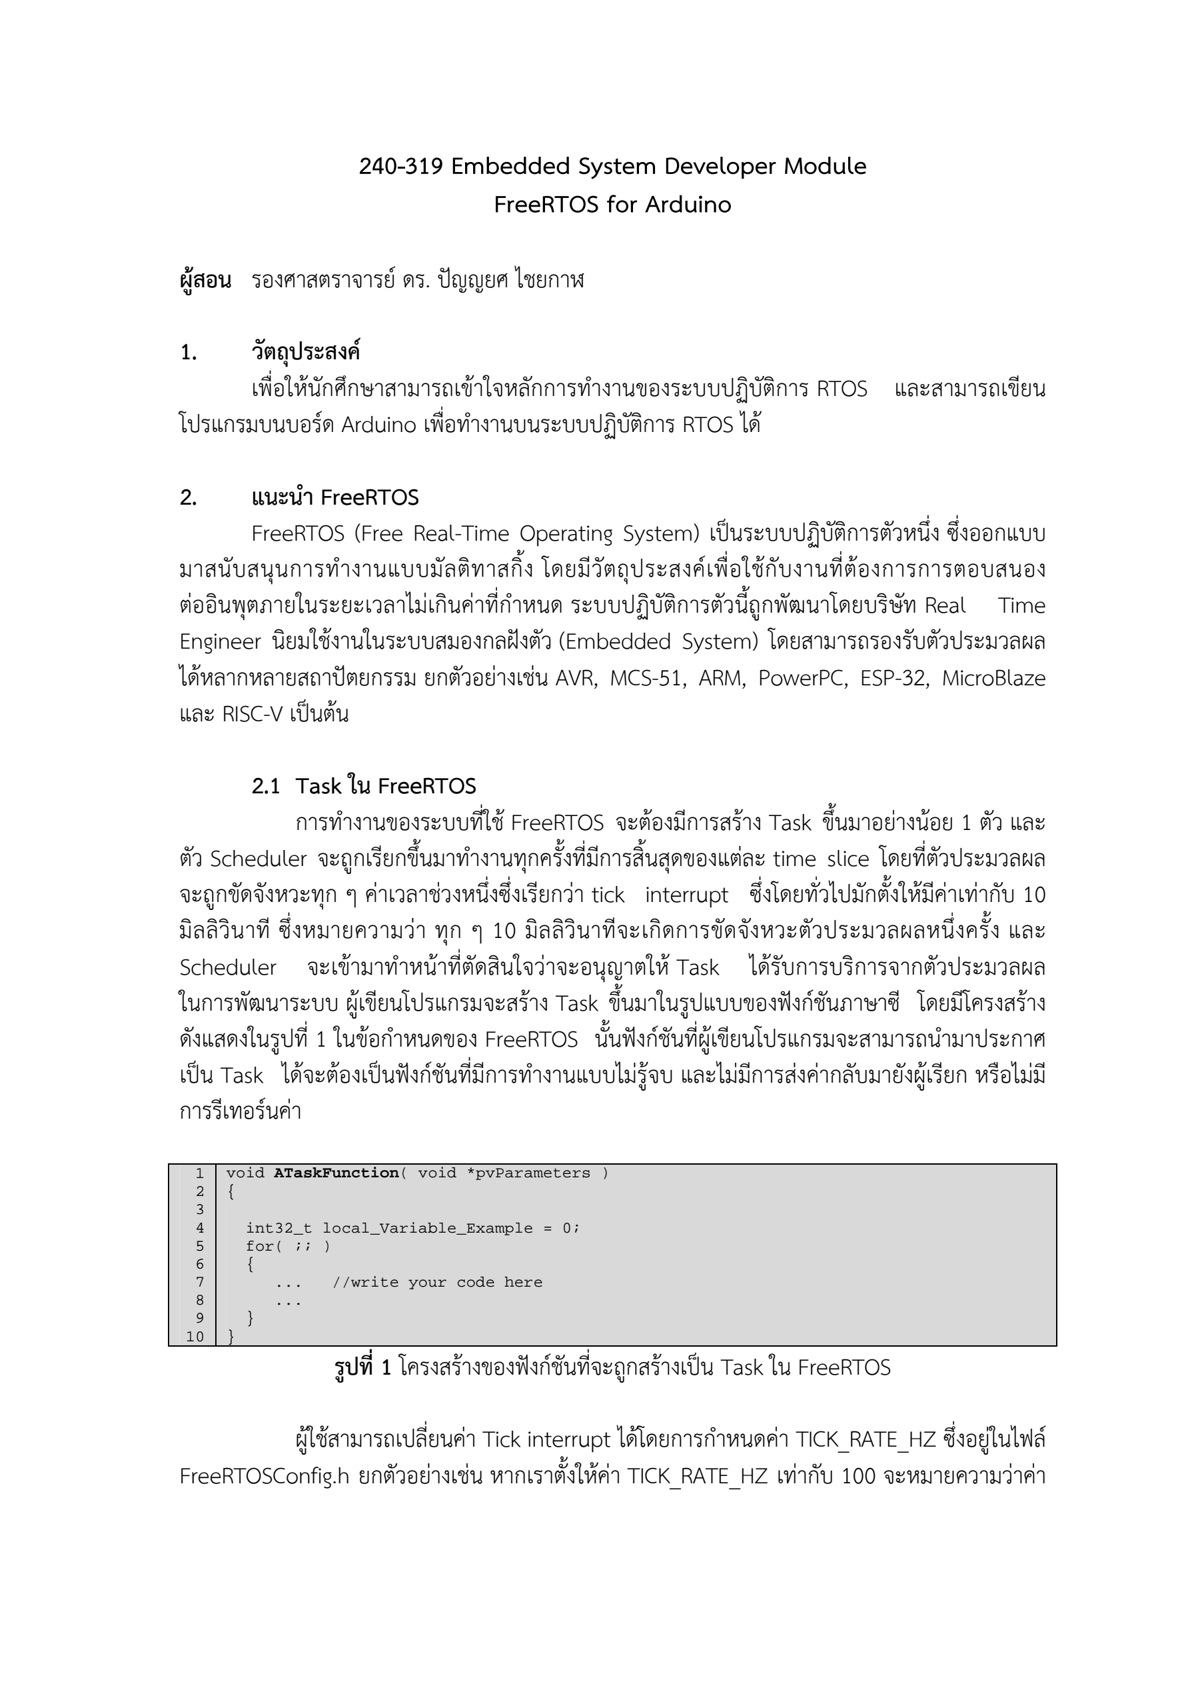
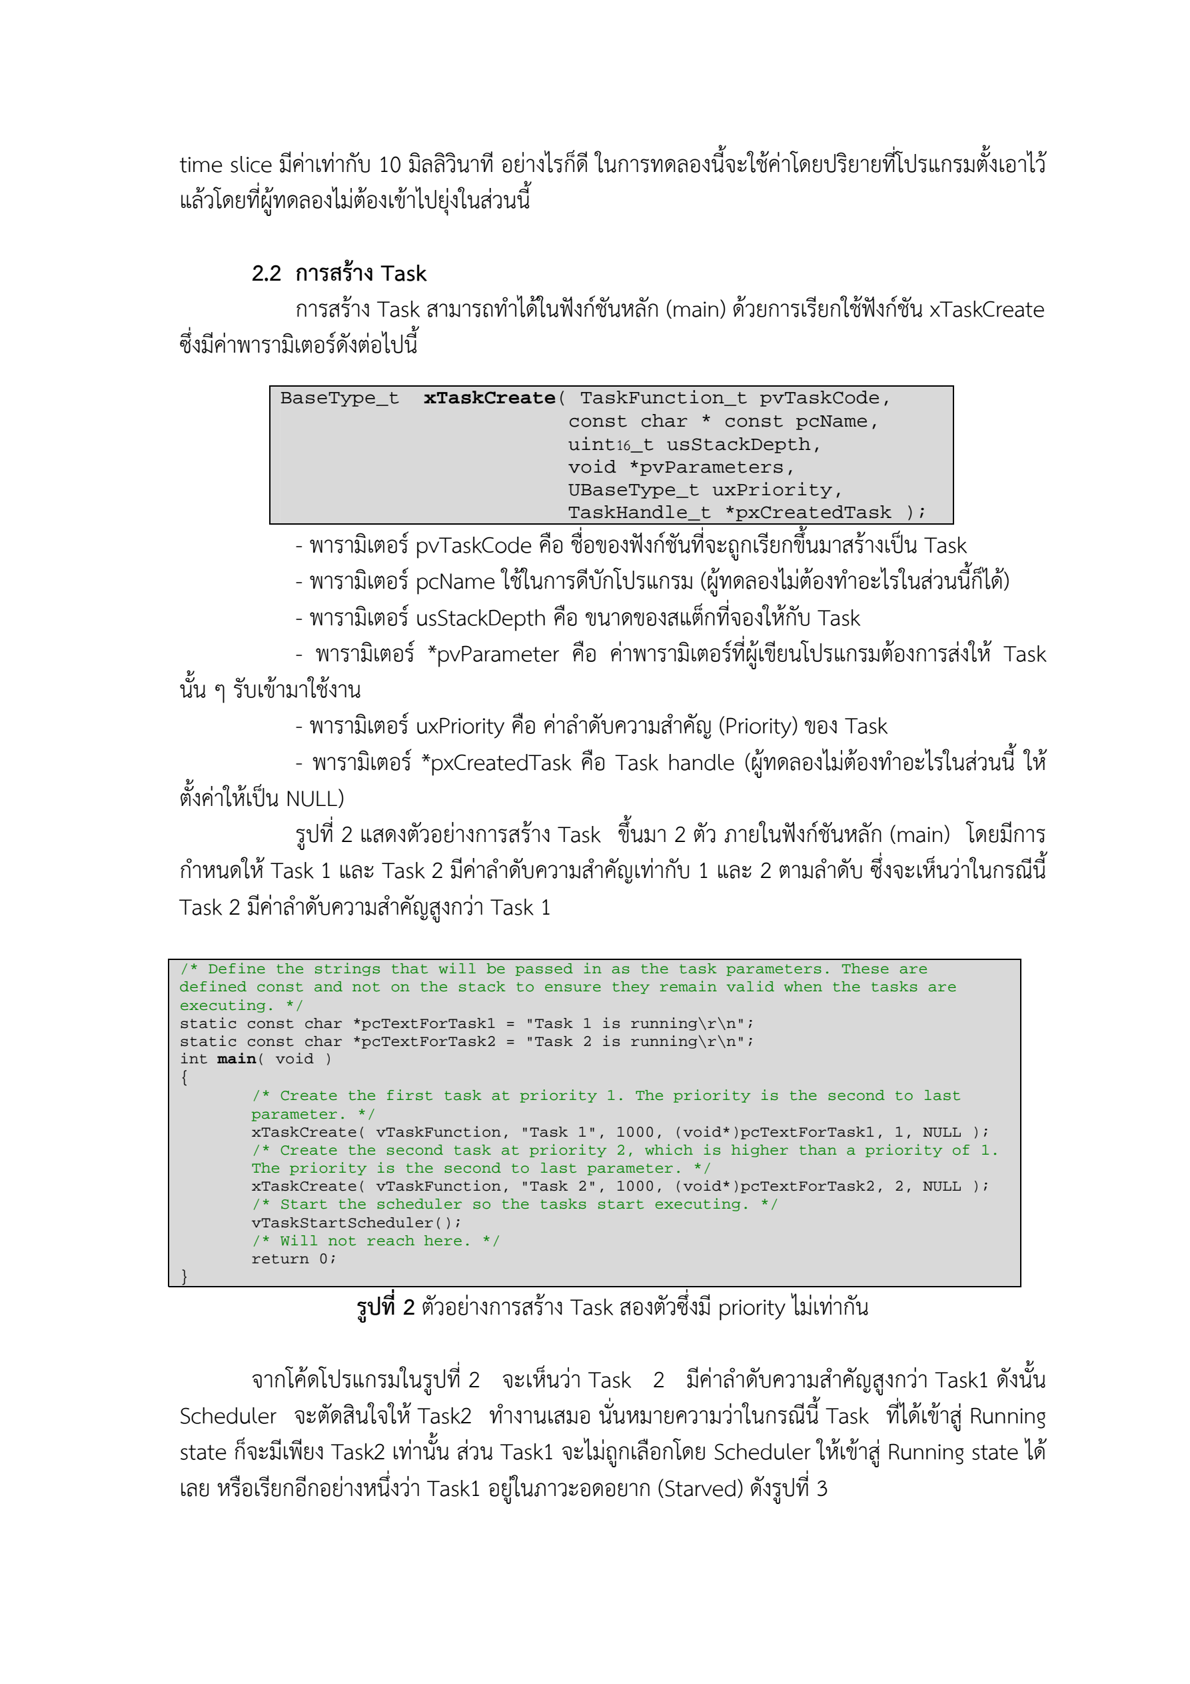
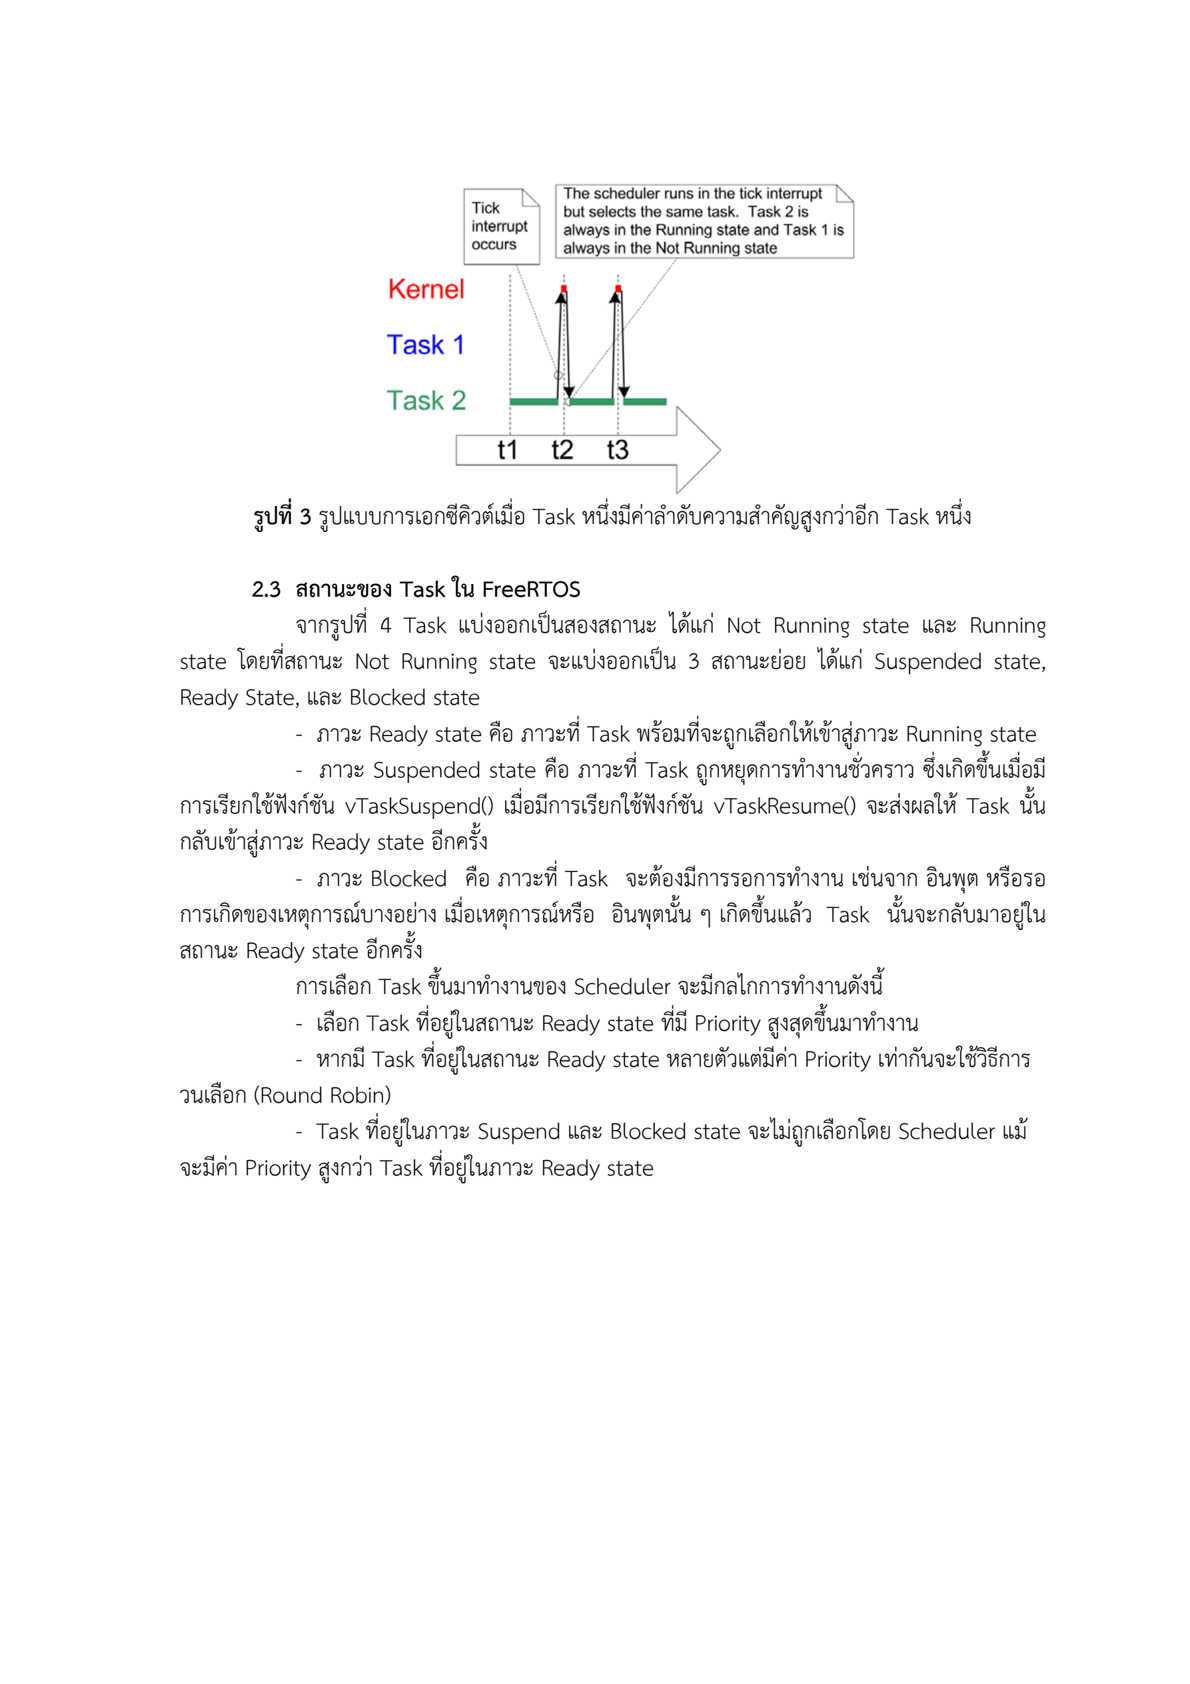
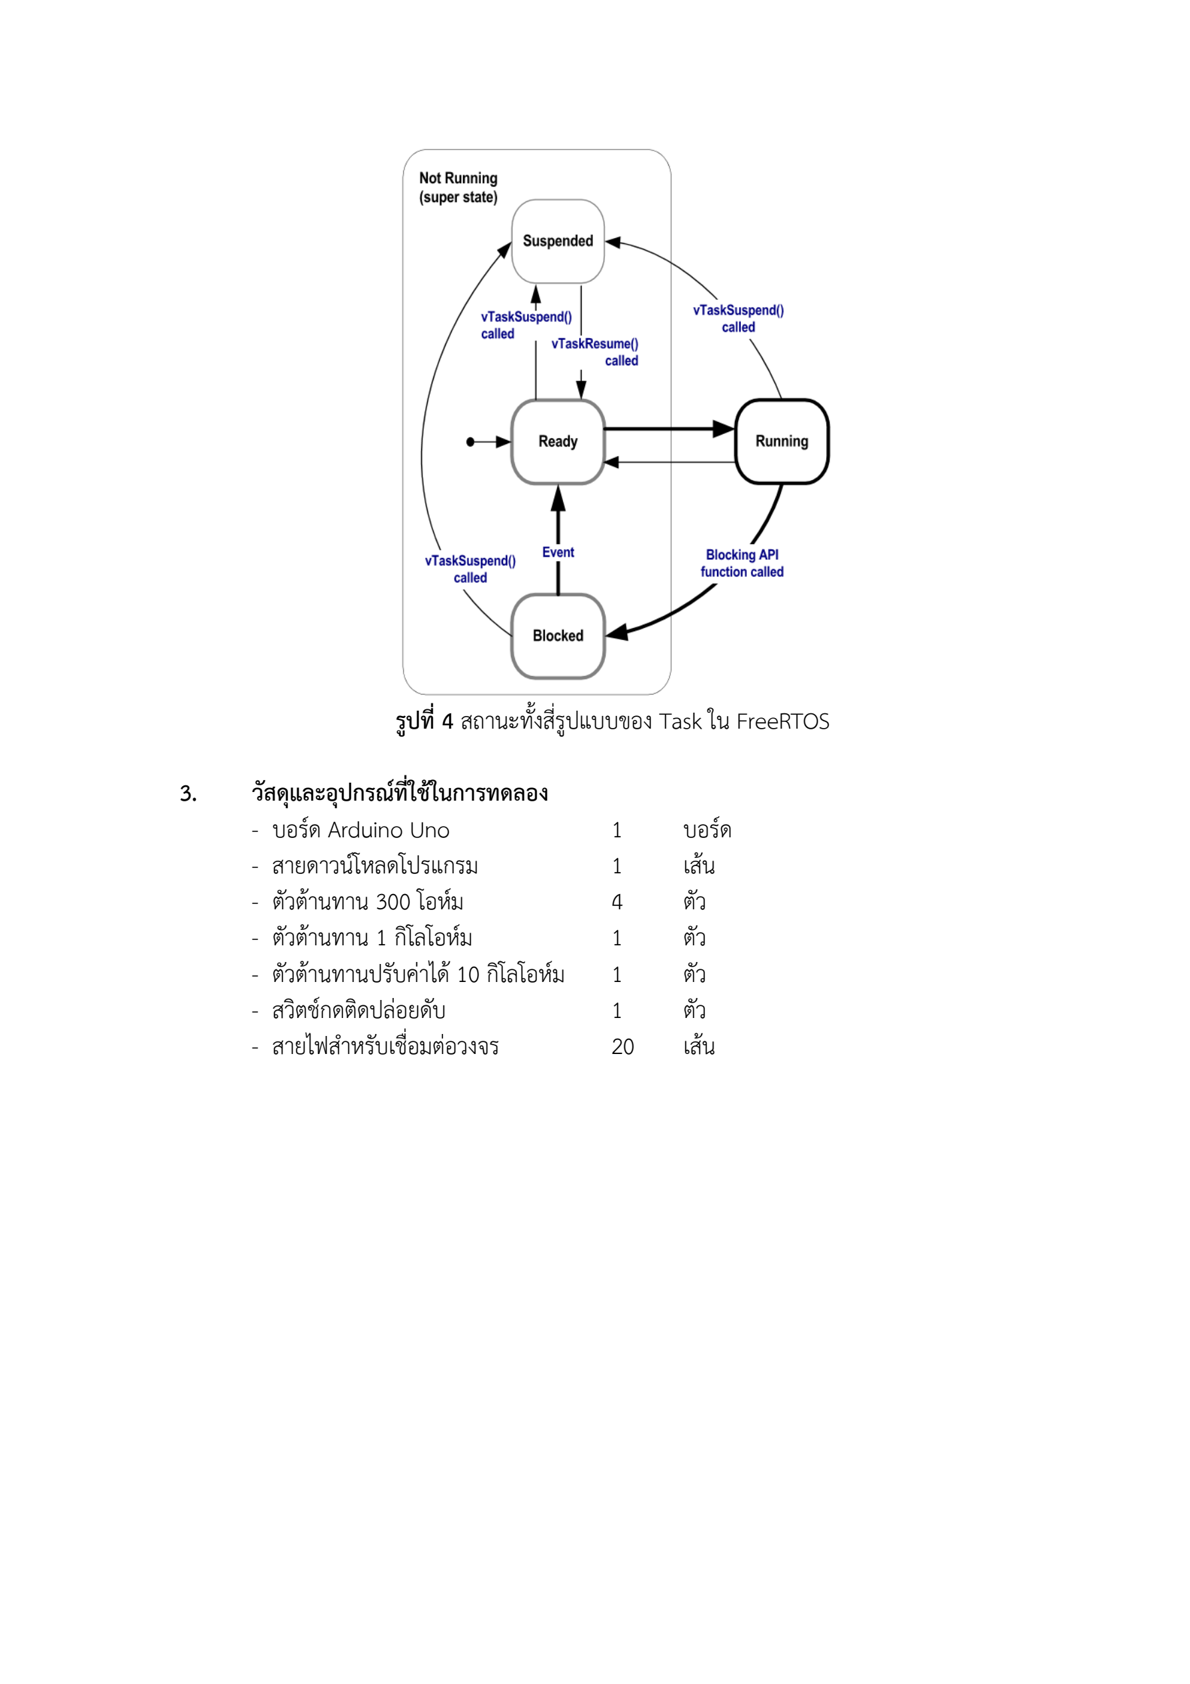
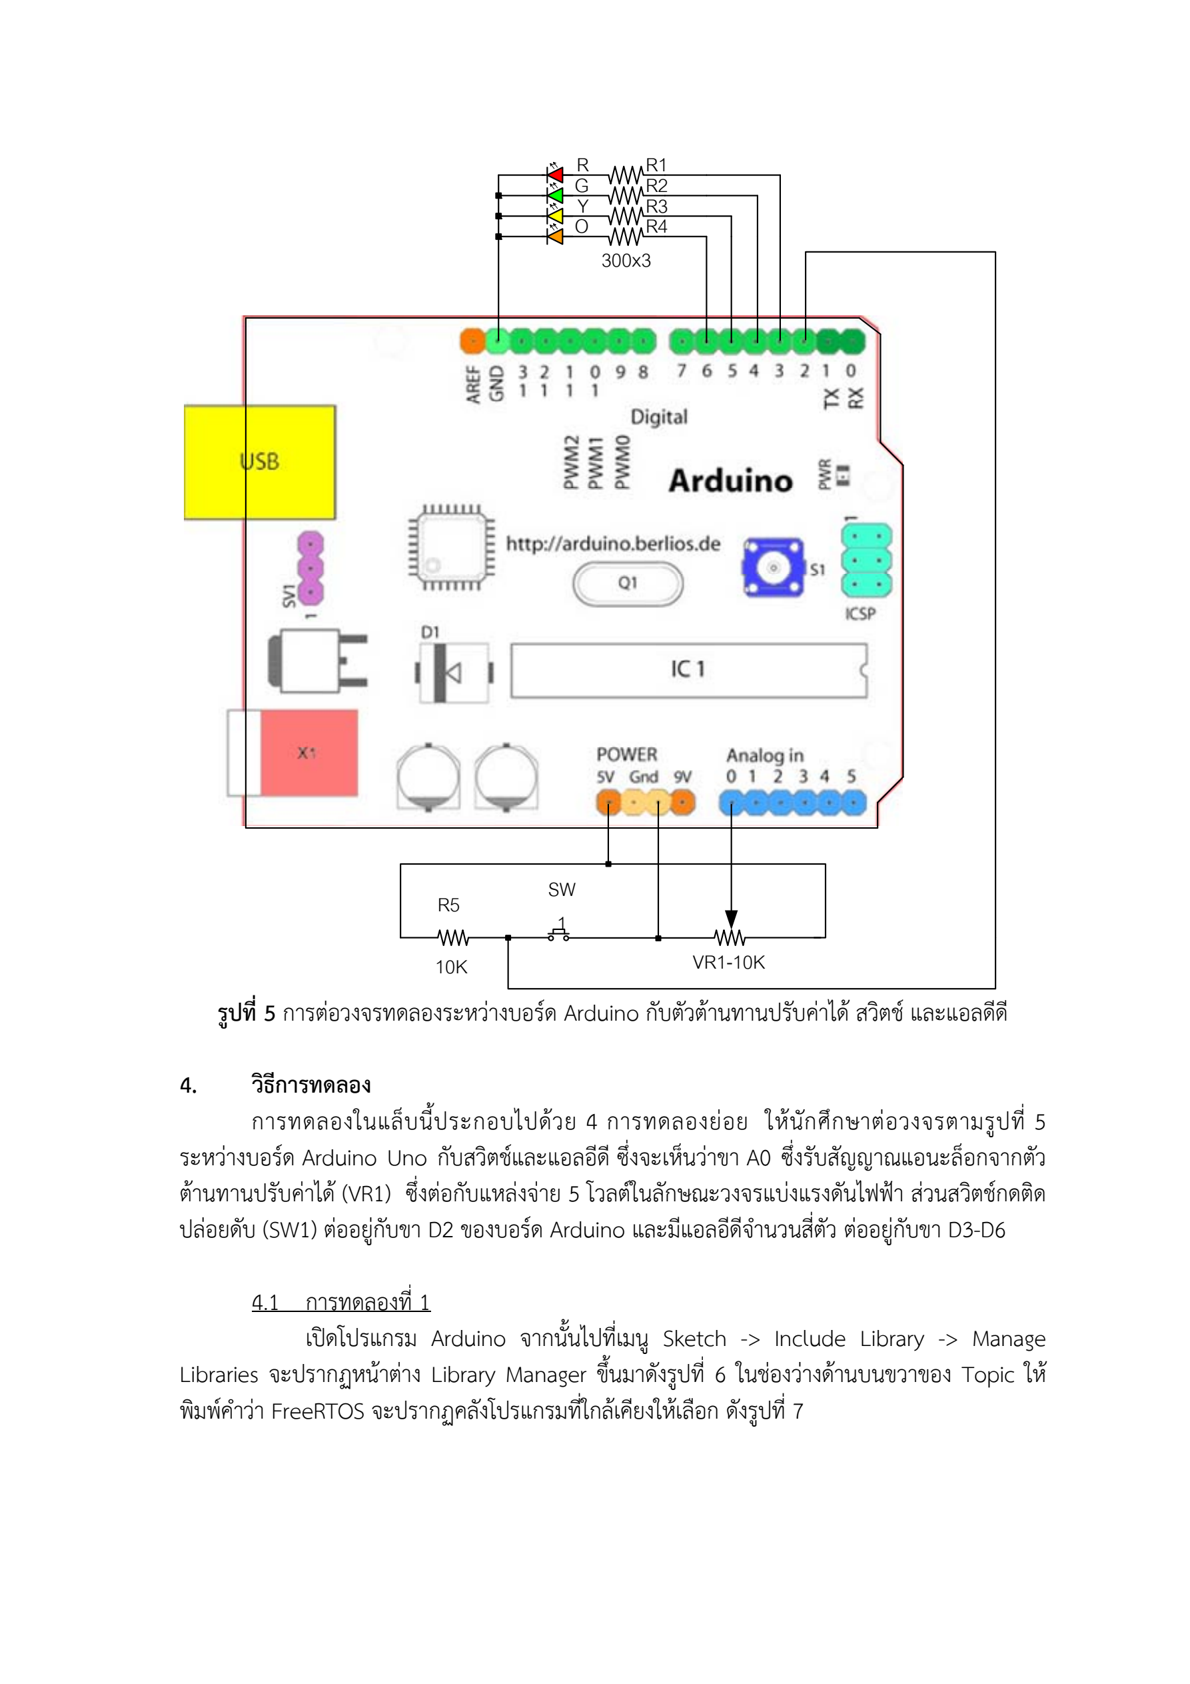
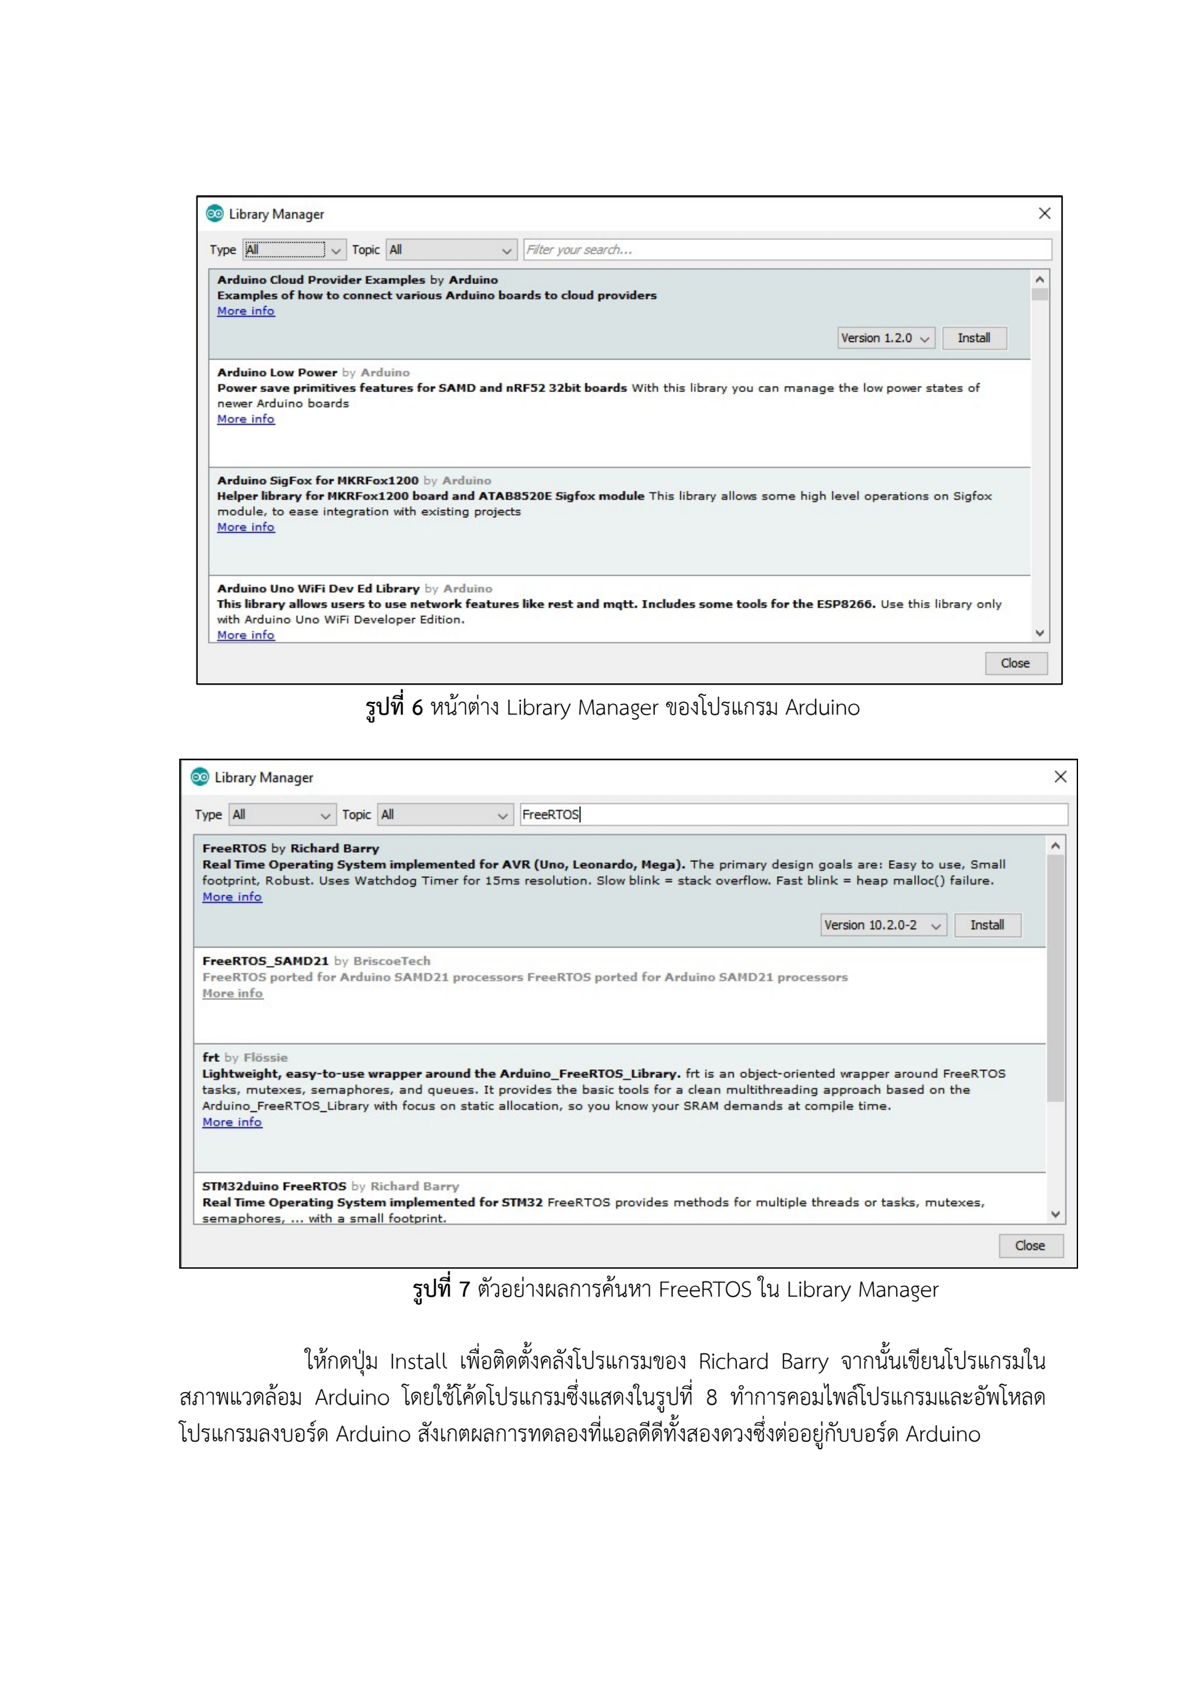
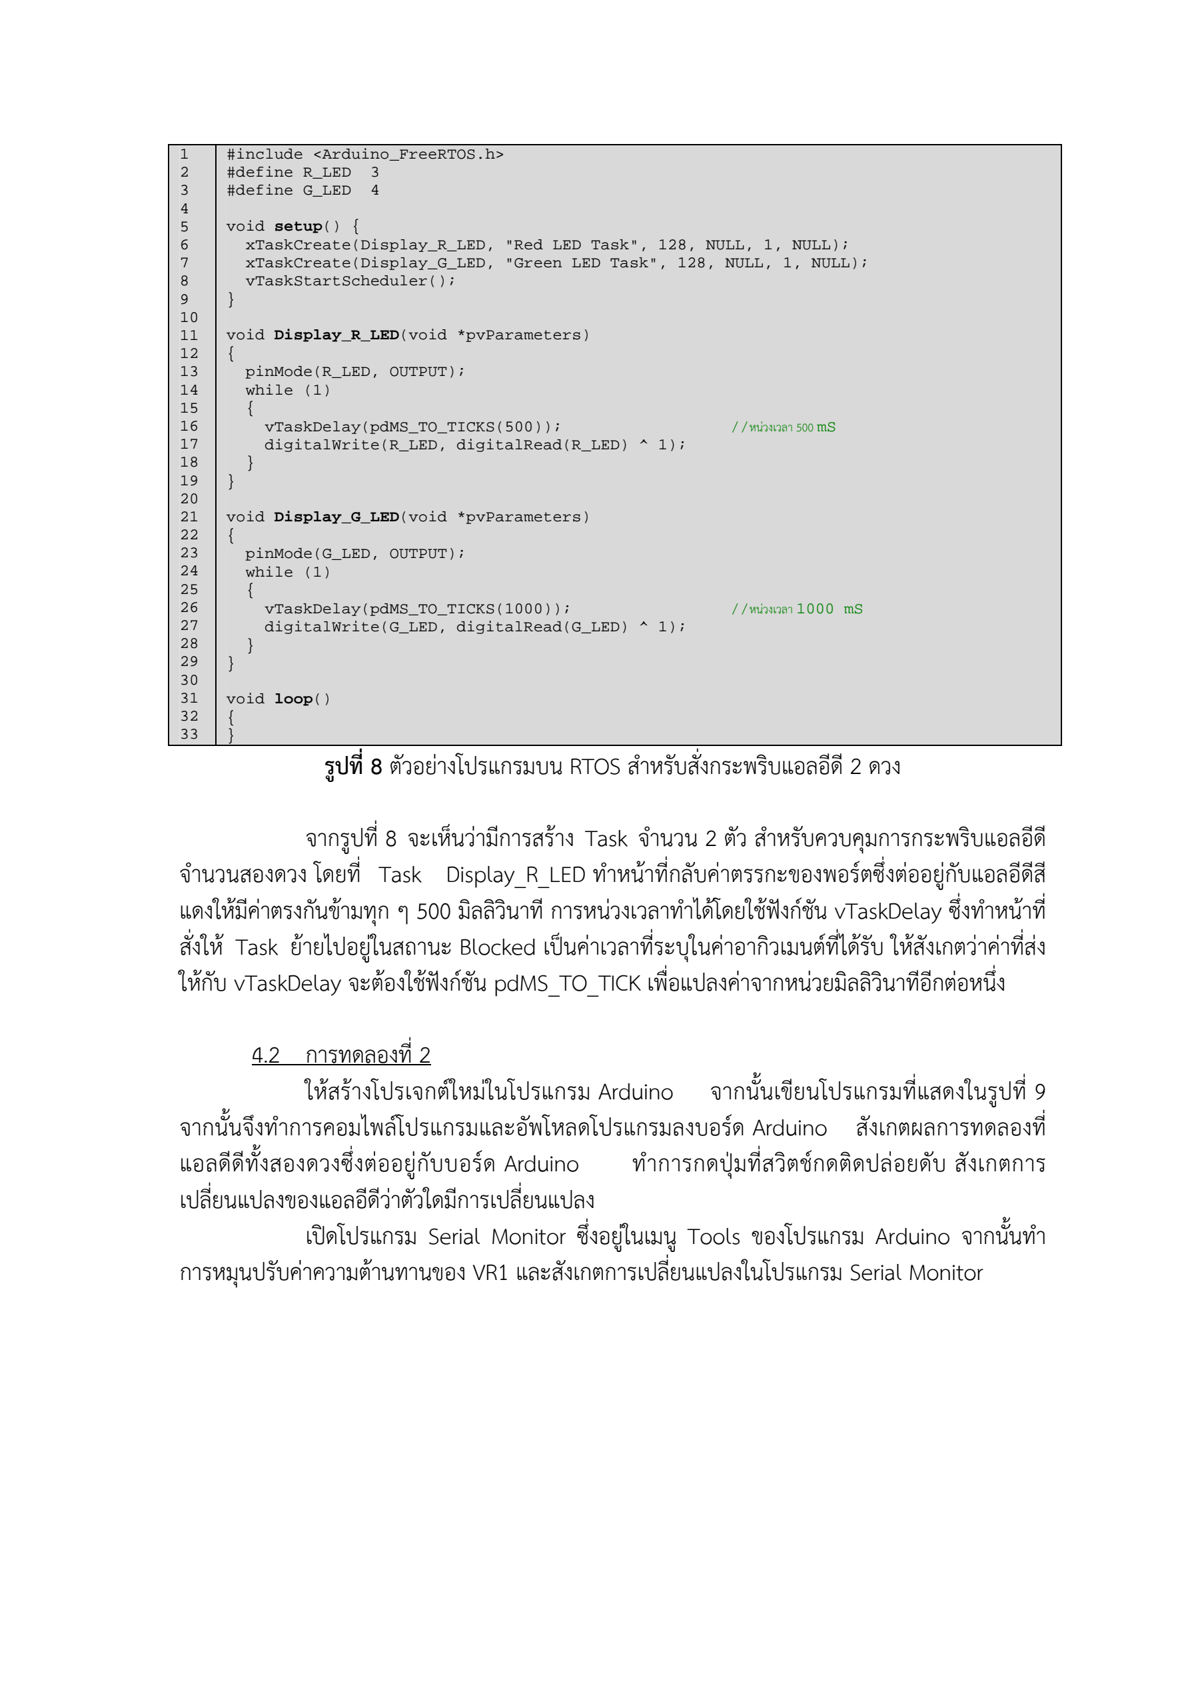
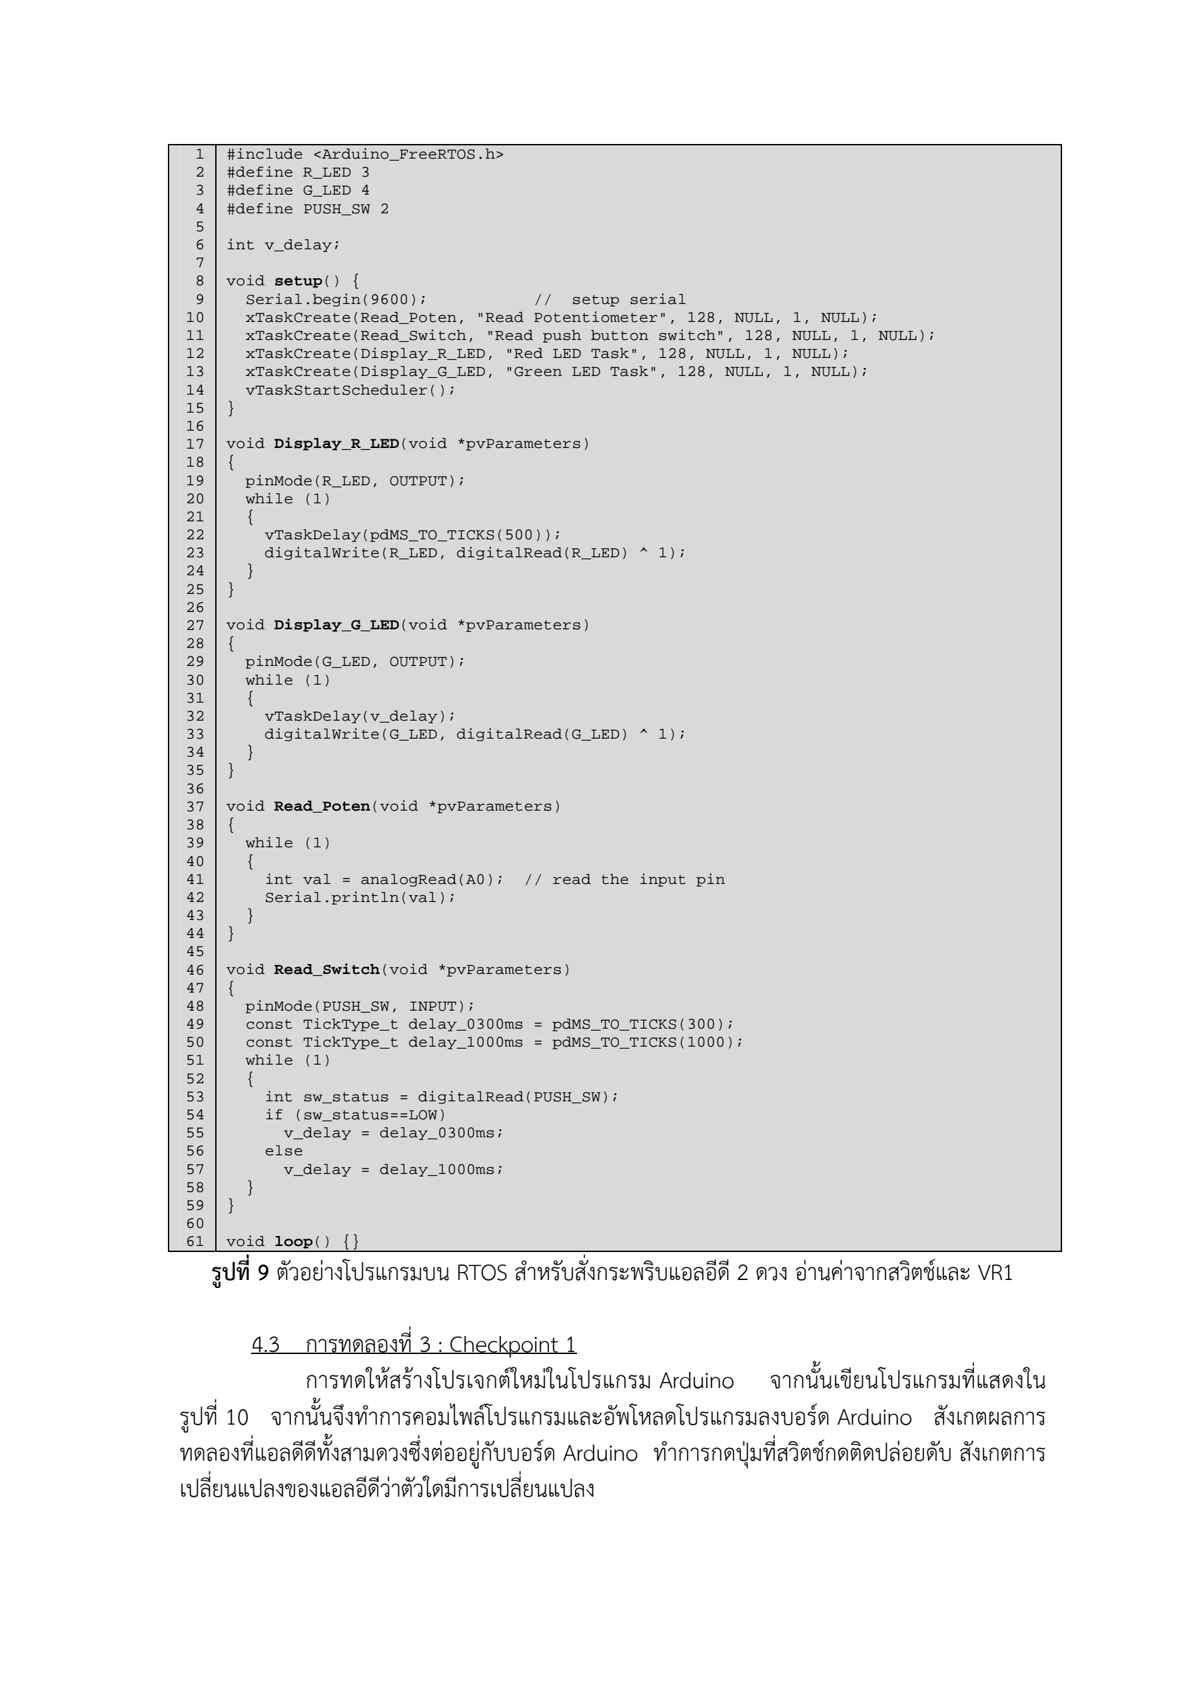
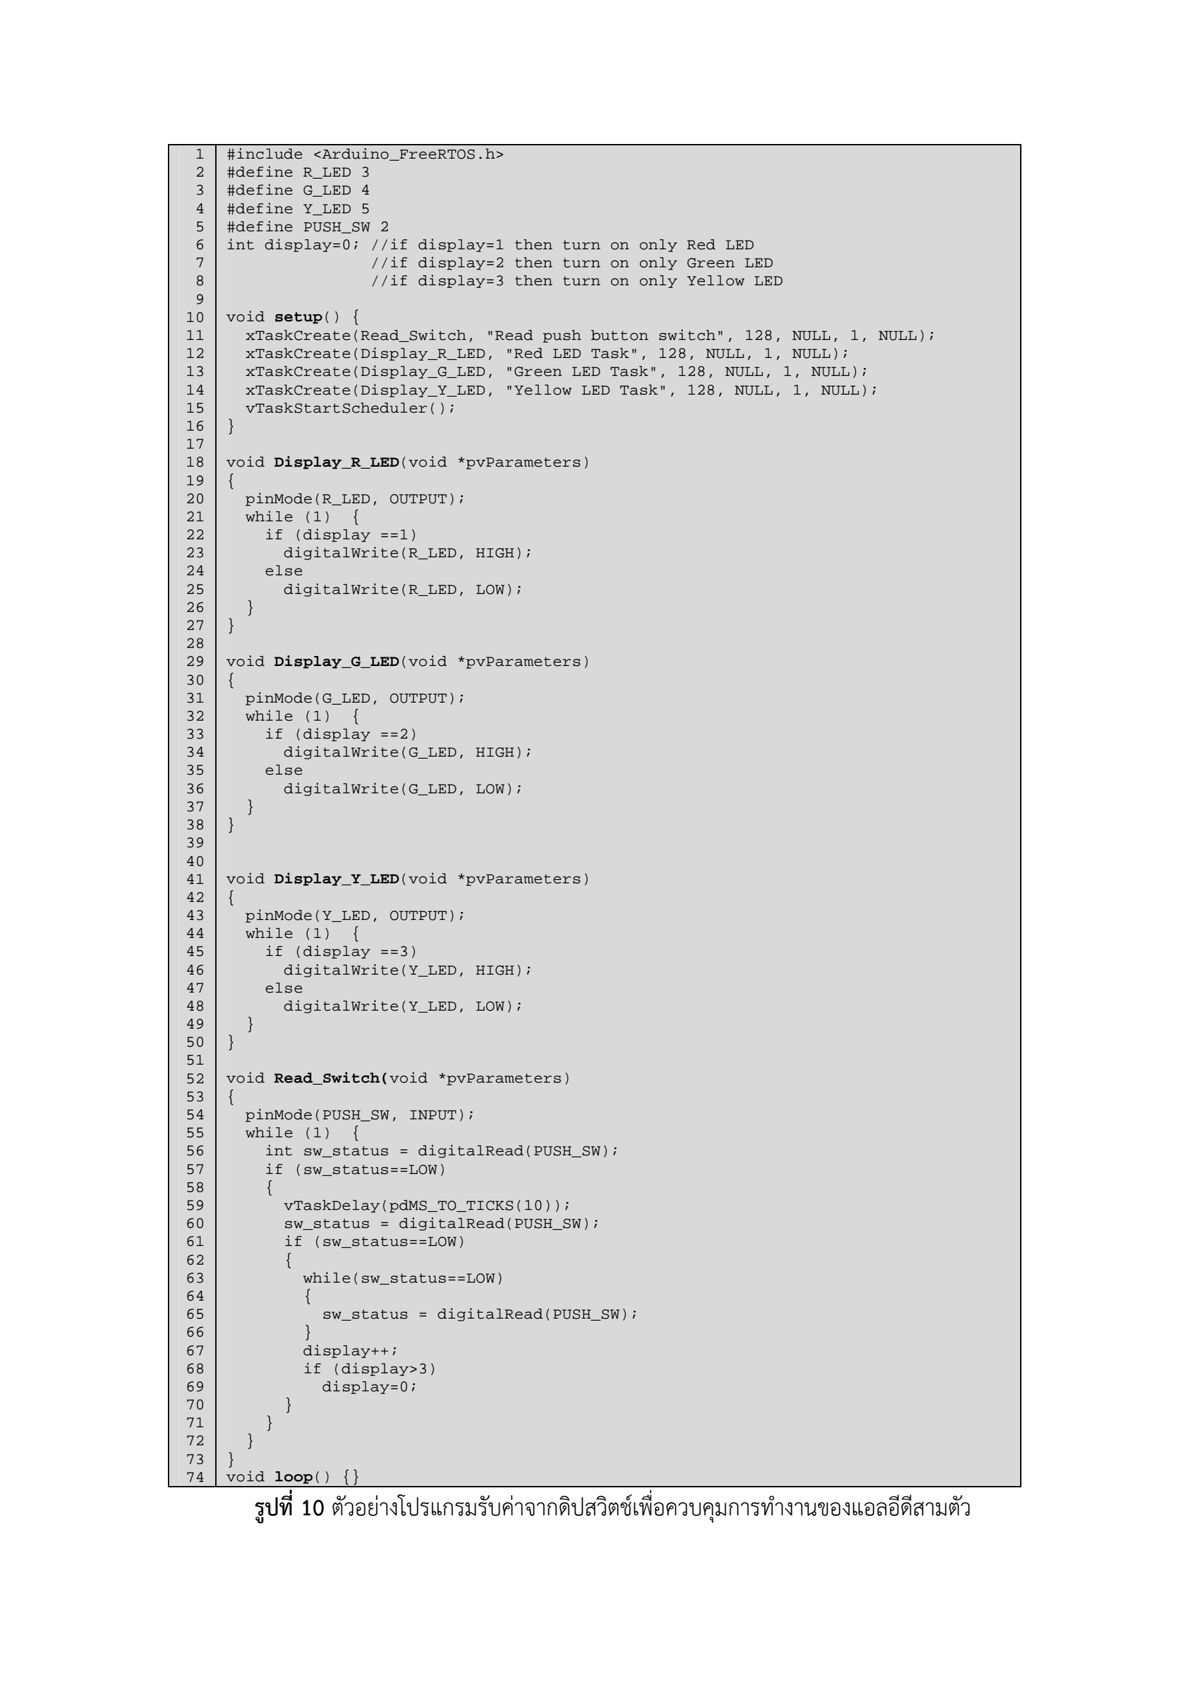
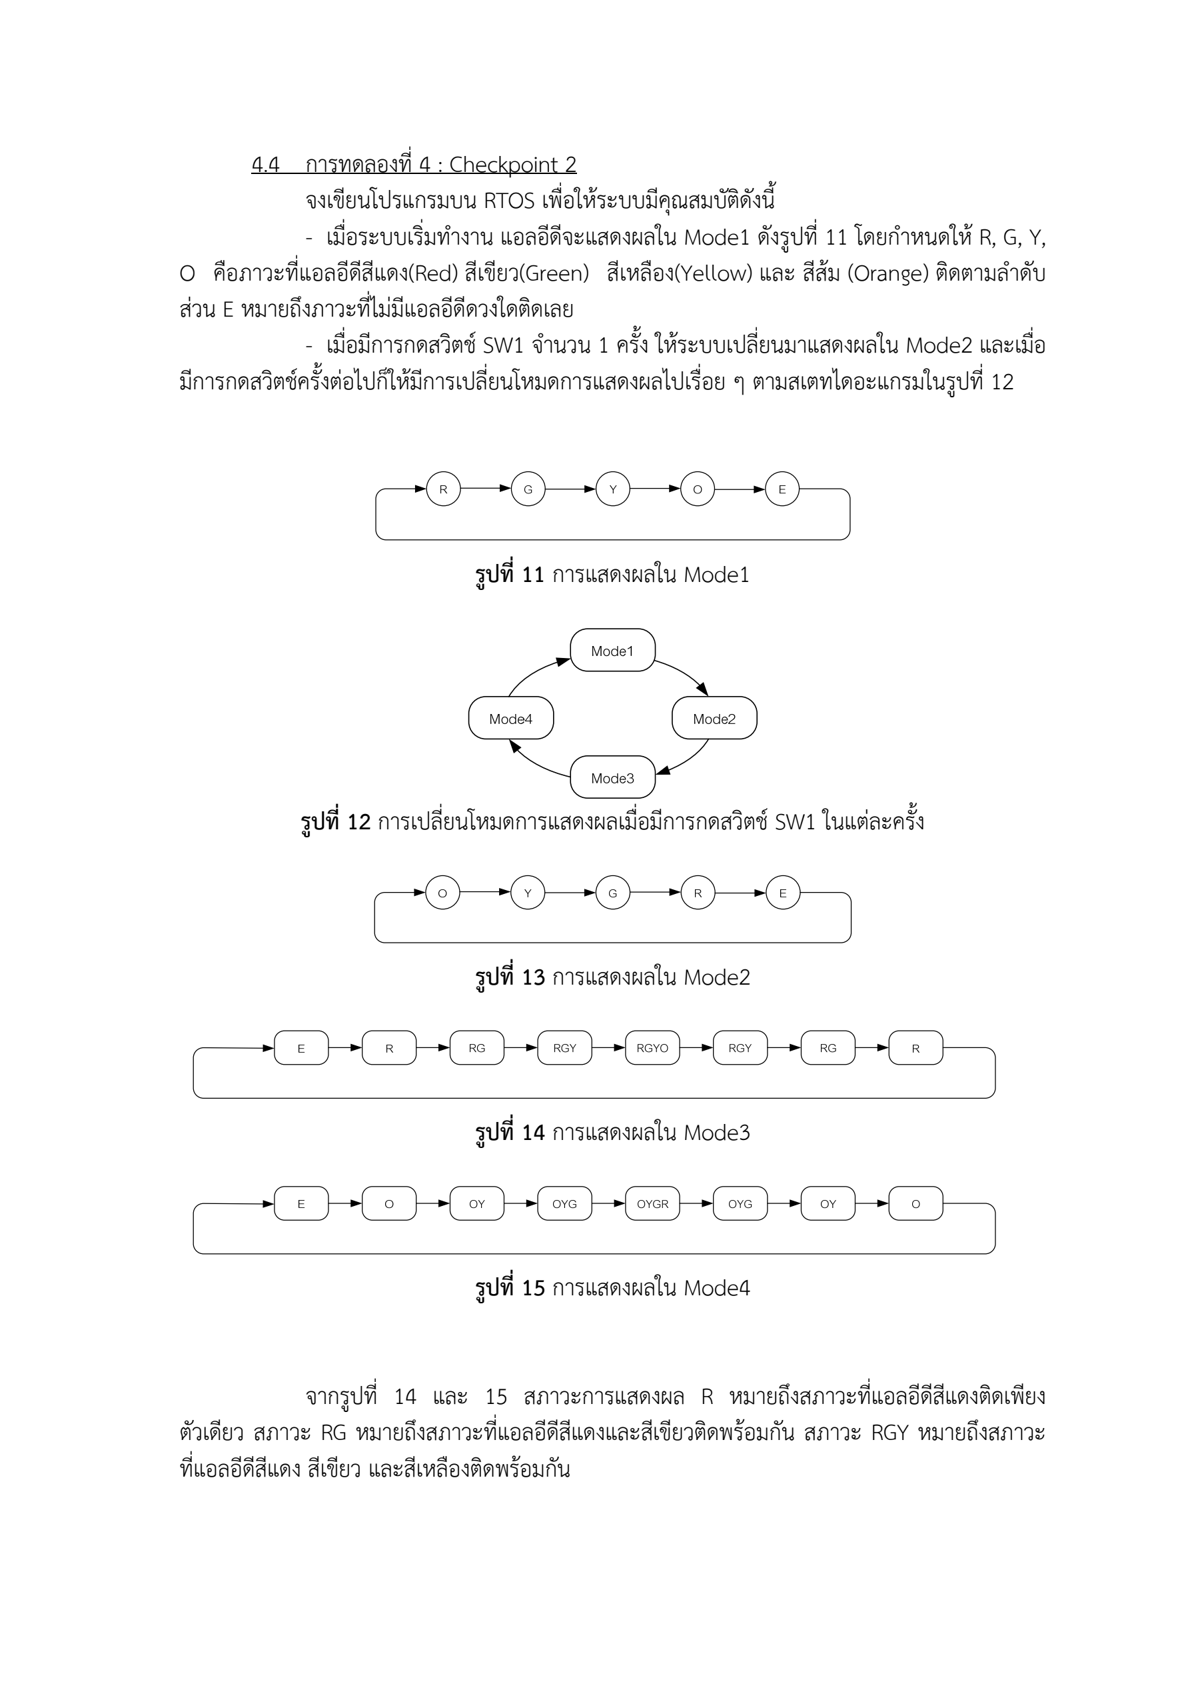
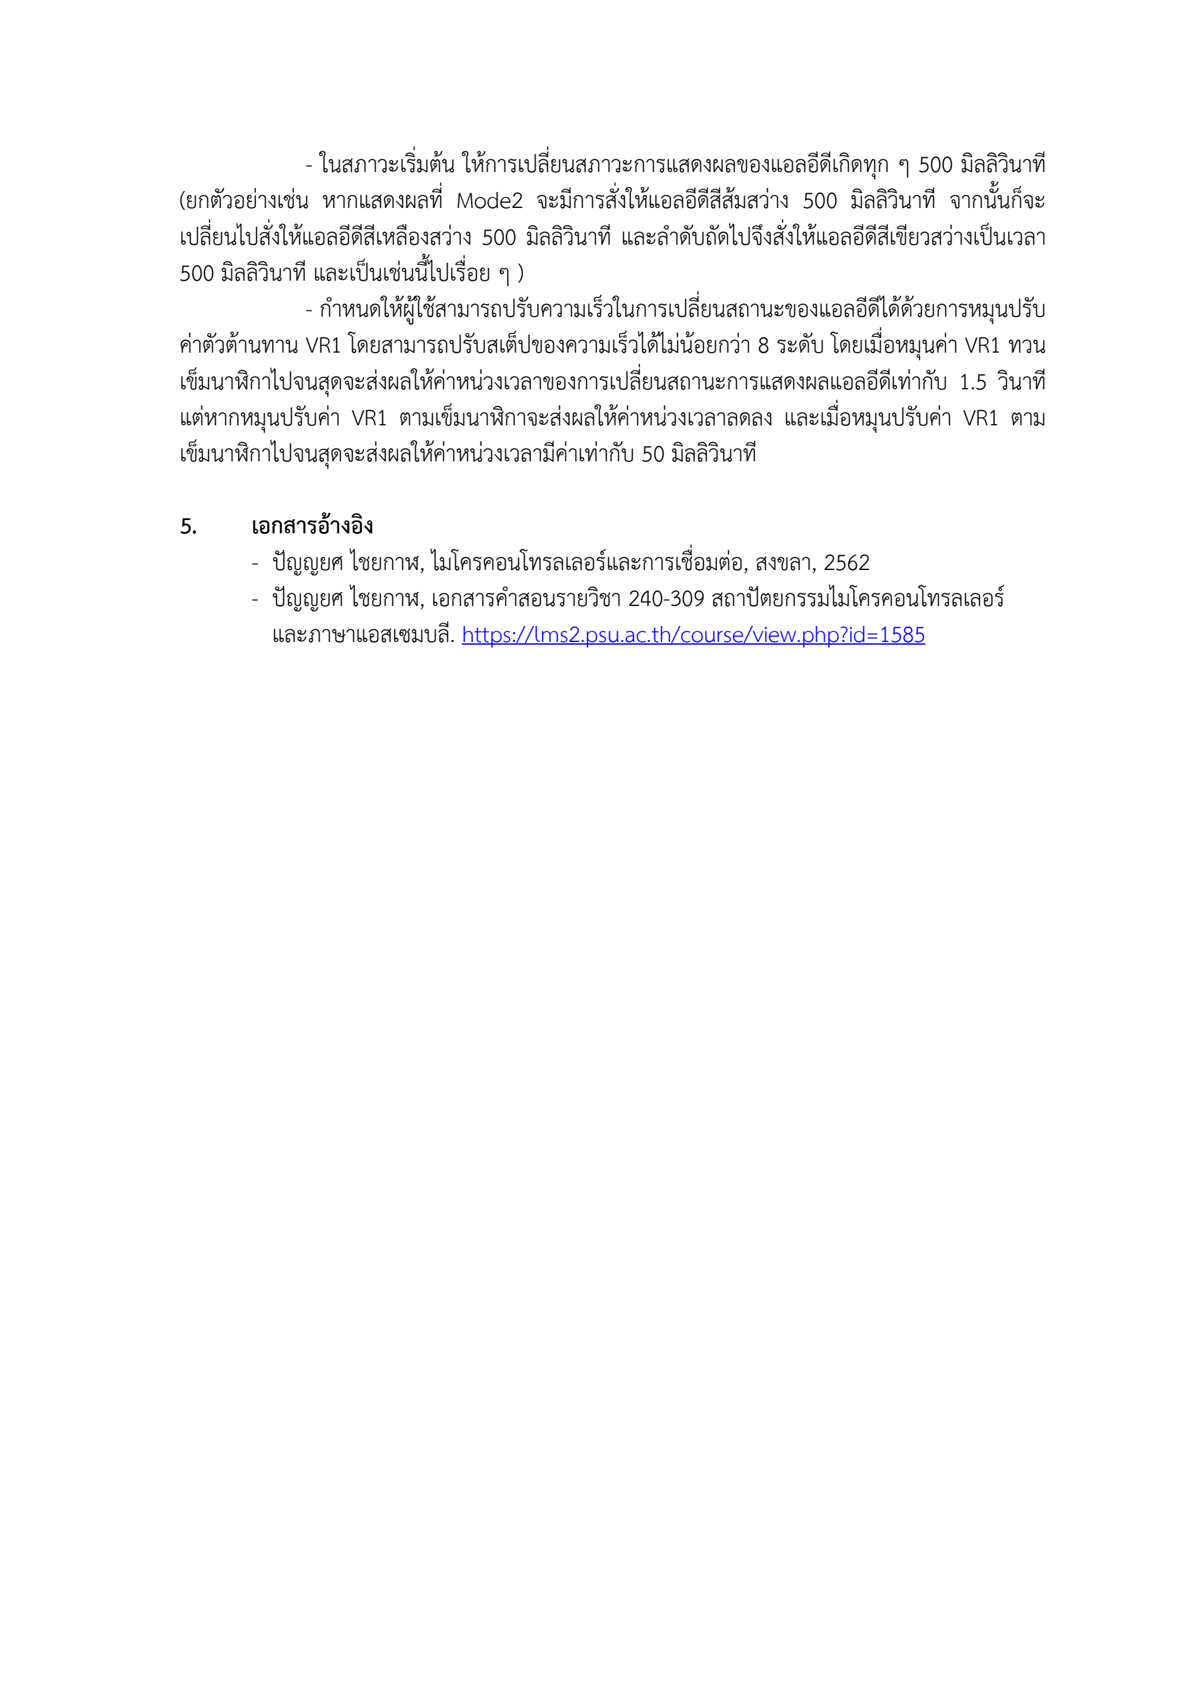

In [27]:
conv_res.dict()['document']

In [ ]:

import json
import sys
import time
from pathlib import Path

from docling_core.types.doc import DocItemLabel, ImageRefMode
from docling_core.types.doc.document import DEFAULT_EXPORT_LABELS
from tabulate import tabulate

from docling.datamodel import vlm_model_specs
from docling.datamodel.accelerator_options import AcceleratorDevice
from docling.datamodel.base_models import InputFormat
from docling.datamodel.pipeline_options import (
    VlmPipelineOptions,
)
from docling.datamodel.pipeline_options_vlm_model import (
    InferenceFramework,
    InlineVlmOptions,
    ResponseFormat,
    TransformersModelType,
    TransformersPromptStyle,
)
from docling.document_converter import DocumentConverter, PdfFormatOption
from docling.pipeline.vlm_pipeline import VlmPipeline


def convert(sources: list[Path], converter: DocumentConverter):
    # Note: this helper assumes a single-item `sources` list. It returns after
    # processing the first source to keep runtime/output focused.
    model_id = pipeline_options.vlm_options.repo_id.replace("/", "_")
    framework = pipeline_options.vlm_options.inference_framework
    for source in sources:
        print("================================================")
        print("Processing...")
        print(f"Source: {source}")
        print("---")
        print(f"Model: {model_id}")
        print(f"Framework: {framework}")
        print("================================================")
        print("")

        res = converter.convert(source)

        print("")

        fname = f"{res.input.file.stem}-{model_id}-{framework}"

        inference_time = 0.0
        for i, page in enumerate(res.pages):
            inference_time += page.predictions.vlm_response.generation_time
            print("")
            print(
                f" ---------- Predicted page {i} in {pipeline_options.vlm_options.response_format} in {page.predictions.vlm_response.generation_time} [sec]:"
            )
            print(page.predictions.vlm_response.text)
            print(" ---------- ")

        print("===== Final output of the converted document =======")

        # Manual export for illustration. Below, `save_as_json()` writes the same
        # JSON again; kept intentionally to show both approaches.
        with (out_path / f"{fname}.json").open("w") as fp:
            fp.write(json.dumps(res.document.export_to_dict()))

        res.document.save_as_json(
            out_path / f"{fname}.json",
            image_mode=ImageRefMode.PLACEHOLDER,
        )
        print(f" => produced {out_path / fname}.json")

        res.document.save_as_markdown(
            out_path / f"{fname}.md",
            image_mode=ImageRefMode.PLACEHOLDER,
        )
        print(f" => produced {out_path / fname}.md")

        res.document.save_as_html(
            out_path / f"{fname}.html",
            image_mode=ImageRefMode.EMBEDDED,
            labels=[*DEFAULT_EXPORT_LABELS, DocItemLabel.FOOTNOTE],
            split_page_view=True,
        )
        print(f" => produced {out_path / fname}.html")

        pg_num = res.document.num_pages()
        print("")
        print(
            f"Total document prediction time: {inference_time:.2f} seconds, pages: {pg_num}"
        )
        print("====================================================")

        return [
            source,
            model_id,
            str(framework),
            pg_num,
            inference_time,
        ]


if __name__ == "__main__":
    sources = [
        "tests/data/pdf/2305.03393v1-pg9.pdf",
    ]

    out_path = Path("scratch")
    out_path.mkdir(parents=True, exist_ok=True)

    ## Definiton of more inline models
    llava_qwen = InlineVlmOptions(
        repo_id="llava-hf/llava-interleave-qwen-0.5b-hf",
        # prompt="Read text in the image.",
        prompt="Convert this page to markdown. Do not miss any text and only output the bare markdown!",
        # prompt="Parse the reading order of this document.",
        response_format=ResponseFormat.MARKDOWN,
        inference_framework=InferenceFramework.TRANSFORMERS,
        transformers_model_type=TransformersModelType.AUTOMODEL_IMAGETEXTTOTEXT,
        supported_devices=[AcceleratorDevice.CUDA, AcceleratorDevice.CPU],
        scale=2.0,
        temperature=0.0,
    )

    # Note that this is not the expected way of using the Dolphin model, but it shows the usage of a raw prompt.
    dolphin_oneshot = InlineVlmOptions(
        repo_id="ByteDance/Dolphin",
        prompt="Read text in the image. ",
        response_format=ResponseFormat.MARKDOWN,
        inference_framework=InferenceFramework.TRANSFORMERS,
        transformers_model_type=TransformersModelType.AUTOMODEL_IMAGETEXTTOTEXT,
        transformers_prompt_style=TransformersPromptStyle.RAW,
        supported_devices=[AcceleratorDevice.CUDA, AcceleratorDevice.CPU],
        scale=2.0,
        temperature=0.0,
    )

    ## Use VlmPipeline
    pipeline_options = VlmPipelineOptions()
    pipeline_options.generate_page_images = True

    ## On GPU systems, enable flash_attention_2 with CUDA:
    # pipeline_options.accelerator_options.device = AcceleratorDevice.CUDA
    # pipeline_options.accelerator_options.cuda_use_flash_attention2 = True

    vlm_models = [
        ## DocTags / SmolDocling models
        vlm_model_specs.SMOLDOCLING_MLX,
        vlm_model_specs.SMOLDOCLING_TRANSFORMERS,
        ## Markdown models (using MLX framework)
        vlm_model_specs.QWEN25_VL_3B_MLX,
        vlm_model_specs.PIXTRAL_12B_MLX,
        vlm_model_specs.GEMMA3_12B_MLX,
        ## Markdown models (using Transformers framework)
        vlm_model_specs.GRANITE_VISION_TRANSFORMERS,
        vlm_model_specs.PHI4_TRANSFORMERS,
        vlm_model_specs.PIXTRAL_12B_TRANSFORMERS,
        ## More inline models
        dolphin_oneshot,
        llava_qwen,
    ]

    # Remove MLX models if not on Mac
    if sys.platform != "darwin":
        vlm_models = [
            m for m in vlm_models if m.inference_framework != InferenceFramework.MLX
        ]

    rows = []
    for vlm_options in vlm_models:
        pipeline_options.vlm_options = vlm_options

        ## Set up pipeline for PDF or image inputs
        converter = DocumentConverter(
            format_options={
                InputFormat.PDF: PdfFormatOption(
                    pipeline_cls=VlmPipeline,
                    pipeline_options=pipeline_options,
                ),
                InputFormat.IMAGE: PdfFormatOption(
                    pipeline_cls=VlmPipeline,
                    pipeline_options=pipeline_options,
                ),
            },
        )

        row = convert(sources=sources, converter=converter)
        rows.append(row)

        print(
            tabulate(
                rows, headers=["source", "model_id", "framework", "num_pages", "time"]
            )
        )

        print("see if memory gets released ...")
        time.sleep(10)